# Data Preparation

In [149]:
from nltk.corpus import stopwords
import string

In [150]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [151]:
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

In [152]:
# test to load a document
filename = 'txt_sentoken/pos/cv000_29590.txt'
text = load_doc(filename)
tokens = clean_doc(text)
print(tokens)

['films', 'adapted', 'comic', 'books', 'plenty', 'success', 'whether', 'theyre', 'superheroes', 'batman', 'superman', 'spawn', 'geared', 'toward', 'kids', 'casper', 'arthouse', 'crowd', 'ghost', 'world', 'theres', 'never', 'really', 'comic', 'book', 'like', 'hell', 'starters', 'created', 'alan', 'moore', 'eddie', 'campbell', 'brought', 'medium', 'whole', 'new', 'level', 'mid', 'series', 'called', 'watchmen', 'say', 'moore', 'campbell', 'thoroughly', 'researched', 'subject', 'jack', 'ripper', 'would', 'like', 'saying', 'michael', 'jackson', 'starting', 'look', 'little', 'odd', 'book', 'graphic', 'novel', 'pages', 'long', 'includes', 'nearly', 'consist', 'nothing', 'footnotes', 'words', 'dont', 'dismiss', 'film', 'source', 'get', 'past', 'whole', 'comic', 'book', 'thing', 'might', 'find', 'another', 'stumbling', 'block', 'hells', 'directors', 'albert', 'allen', 'hughes', 'getting', 'hughes', 'brothers', 'direct', 'seems', 'almost', 'ludicrous', 'casting', 'carrot', 'top', 'well', 'anythi

# Define a Vocabulary

In [153]:

from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

In [154]:
# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # update counts
    vocab.update(tokens)

In [155]:
# version 1 _ process_docs
# load all docs in a directory
def process_docs(directory, vocab):
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip files that do not have the right extension
        if not filename.endswith(".txt"):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # add doc to vocab
        add_doc_to_vocab(path, vocab)

In [156]:
# define vocab
vocab = Counter()
# add all docs to vocab
process_docs('txt_sentoken/neg', vocab)
process_docs('txt_sentoken/pos', vocab)
# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))

46557
[('film', 8860), ('one', 5521), ('movie', 5440), ('like', 3553), ('even', 2555), ('good', 2320), ('time', 2283), ('story', 2118), ('films', 2102), ('would', 2042), ('much', 2024), ('also', 1965), ('characters', 1947), ('get', 1921), ('character', 1906), ('two', 1825), ('first', 1768), ('see', 1730), ('well', 1694), ('way', 1668), ('make', 1590), ('really', 1563), ('little', 1491), ('life', 1472), ('plot', 1451), ('people', 1420), ('movies', 1416), ('could', 1395), ('bad', 1374), ('scene', 1373), ('never', 1364), ('best', 1301), ('new', 1277), ('many', 1268), ('doesnt', 1267), ('man', 1266), ('scenes', 1265), ('dont', 1210), ('know', 1207), ('hes', 1150), ('great', 1141), ('another', 1111), ('love', 1089), ('action', 1078), ('go', 1075), ('us', 1065), ('director', 1056), ('something', 1048), ('end', 1047), ('still', 1038)]


In [157]:
# keep tokens with > 5 occurrence
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))

27139


In [158]:
def save_list(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [159]:
# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')

In [160]:
# load vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

In [161]:
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

In [162]:
# version 2 _ process_docs
# load all docs in a directory
def process_docs(directory, vocab):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip files that do not have the right extension
        if not filename.endswith(".txt"):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # add doc to vocab
        add_doc_to_vocab(path, vocab)

In [163]:
# define vocab
vocab = Counter()
# add all docs to vocab
process_docs('txt_sentoken/pos', vocab)
process_docs('txt_sentoken/neg', vocab)
# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))

46557
[('film', 8860), ('one', 5521), ('movie', 5440), ('like', 3553), ('even', 2555), ('good', 2320), ('time', 2283), ('story', 2118), ('films', 2102), ('would', 2042), ('much', 2024), ('also', 1965), ('characters', 1947), ('get', 1921), ('character', 1906), ('two', 1825), ('first', 1768), ('see', 1730), ('well', 1694), ('way', 1668), ('make', 1590), ('really', 1563), ('little', 1491), ('life', 1472), ('plot', 1451), ('people', 1420), ('movies', 1416), ('could', 1395), ('bad', 1374), ('scene', 1373), ('never', 1364), ('best', 1301), ('new', 1277), ('many', 1268), ('doesnt', 1267), ('man', 1266), ('scenes', 1265), ('dont', 1210), ('know', 1207), ('hes', 1150), ('great', 1141), ('another', 1111), ('love', 1089), ('action', 1078), ('go', 1075), ('us', 1065), ('director', 1056), ('something', 1048), ('end', 1047), ('still', 1038)]


In [164]:
# keep tokens with a min occurrence
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))

27139


In [165]:
# save list to file
def save_list(lines, filename):
    # convert lines to a single blob of text
    data = '\n'.join(lines)
    # open file
    file = open(filename, 'w')
    # write text
    file.write(data)
    # close file
    file.close()

# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')

# Bag-of-Words Representation

### 1- Reviews to Lines of Tokens

In [166]:
# version 3 _ process_docs
# load all docs in a directory
def process_docs(directory, vocab):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip files that do not have the right extension
        if not filename.endswith(".txt"):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines

In [167]:
# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

In [168]:
# load all training reviews
positive_lines = process_docs('txt_sentoken/pos', vocab)
negative_lines = process_docs('txt_sentoken/neg', vocab)
# summarize what we have
print(len(positive_lines), len(negative_lines))

1000 1000


### 2- Movie Reviews to Bag-of-Words Vectors

In [185]:
# version 3 _ process_docs: only process reviews in the test dataset
# load all docs in a directory
# load all docs in a directory
def process_docs(directory, vocab, is_trian):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_trian and filename.startswith('cv9'):
            continue
        if not is_trian and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines


In [186]:
# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

In [187]:
# load all training reviews
positive_lines = process_docs('txt_sentoken/pos', vocab, True)
negative_lines = process_docs('txt_sentoken/neg', vocab, True)
# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
docs = negative_lines + positive_lines
tokenizer.fit_on_texts(docs)

In [188]:
# encode training data set
Xtrain = tokenizer.texts_to_matrix(docs, mode='freq')
ytrain = array([0 for _ in range(900)] + [1 for _ in range(900)])

In [189]:
print(Xtrain.shape)

(1800, 26897)


In [190]:
# load all test reviews
positive_lines = process_docs('txt_sentoken/pos', vocab, False)
negative_lines = process_docs('txt_sentoken/neg', vocab, False)
docs = negative_lines + positive_lines

In [191]:
# encode training data set
Xtest = tokenizer.texts_to_matrix(docs, mode='freq')
ytest = array([0 for _ in range(100)] + [1 for _ in range(100)])

In [192]:
print(Xtest.shape)

(200, 26897)


# Sentiment Analysis Models


### First Sentiment Analysis Model

Simple MLP model to predict the sentiment of encoded reviews

In [193]:
n_words = Xtest.shape[1]
# define network
model = Sequential()
model.add(Dense(50, input_shape=(n_words,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

- single hidden layer with 50 neurons
- rectified linear activation function

=> The output layer is a single neuron with a sigmoid activation function for predicting 0 for negative and 1 for positive reviews.

The network will be trained using Adam implementation of gradient descent and the binary cross entropy loss function, suited to binary classification problems

In [194]:
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [199]:
# fit network
history = model.fit(Xtrain, ytrain, epochs=50, verbose=2)

Epoch 1/50
57/57 - 0s - loss: 0.0198 - accuracy: 1.0000 - 271ms/epoch - 5ms/step
Epoch 2/50
57/57 - 0s - loss: 0.0187 - accuracy: 1.0000 - 268ms/epoch - 5ms/step
Epoch 3/50
57/57 - 0s - loss: 0.0177 - accuracy: 1.0000 - 278ms/epoch - 5ms/step
Epoch 4/50
57/57 - 0s - loss: 0.0167 - accuracy: 1.0000 - 346ms/epoch - 6ms/step
Epoch 5/50
57/57 - 0s - loss: 0.0159 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 6/50
57/57 - 0s - loss: 0.0150 - accuracy: 1.0000 - 289ms/epoch - 5ms/step
Epoch 7/50
57/57 - 0s - loss: 0.0143 - accuracy: 1.0000 - 295ms/epoch - 5ms/step
Epoch 8/50
57/57 - 0s - loss: 0.0136 - accuracy: 1.0000 - 299ms/epoch - 5ms/step
Epoch 9/50
57/57 - 0s - loss: 0.0129 - accuracy: 1.0000 - 318ms/epoch - 6ms/step
Epoch 10/50
57/57 - 0s - loss: 0.0122 - accuracy: 1.0000 - 297ms/epoch - 5ms/step
Epoch 11/50
57/57 - 0s - loss: 0.0116 - accuracy: 1.0000 - 294ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 0.0111 - accuracy: 1.0000 - 320ms/epoch - 6ms/step
Epoch 13/50
57/57 - 0s - 

In [205]:
# Evaluate the model on the training data
loss, accuracy = model.evaluate(Xtrain, ytrain, verbose=0)
print(f'Training Accuracy: {accuracy*100:.2f}%')

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(Xtest, ytest, verbose=0)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')


Training Accuracy: 100.00%
Test Accuracy: 90.50%


In [201]:
import matplotlib.pyplot as plt


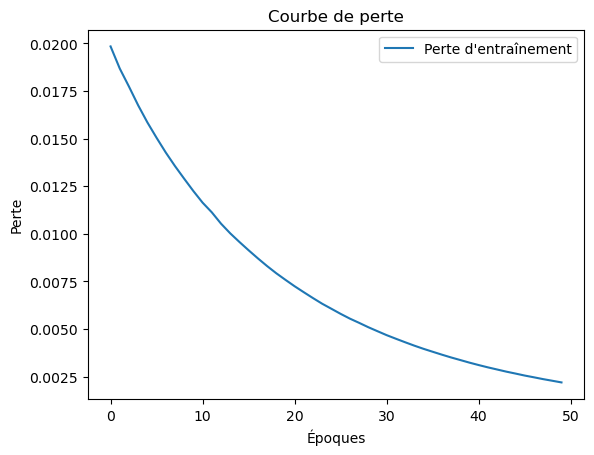

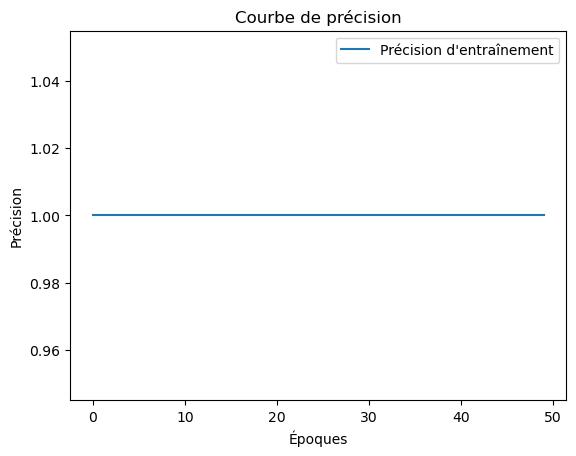

In [203]:

# Courbe de perte pour l'entraînement
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.title('Courbe de perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

# Courbe de précision pour l'entraînement
plt.plot(history.history['accuracy'], label='Précision d\'entraînement')
plt.title('Courbe de précision')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.show()


### Comparing Word Scoring Methods

The texts_to_matrix() function for the Tokenizer in the Keras API provides 4 different methods for scoring words; they are:

- “binary” Where words are marked as present (1) or absent (0).
- “count” Where the occurrence count for each word is marked as an integer.
- “tfidf” Where each word is scored based on their frequency, where words that are common across all documents are penalized.
- “freq” Where words are scored based on their frequency of occurrence within the document.

In [206]:
# prepare bag of words encoding of docs
def prepare_data(train_docs, test_docs, mode):
    # create the tokenizer
    tokenizer = Tokenizer()
    # fit the tokenizer on the documents
    tokenizer.fit_on_texts(train_docs)
    # encode training data set
    Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
    # encode training data set
    Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
    return Xtrain, Xtest

In [207]:
# evaluate a neural network model
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 30
    n_words = Xtest.shape[1]
    for i in range(n_repeats):
        # define network
        model = Sequential()
        model.add(Dense(50, input_shape=(n_words,), activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        # compile network
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        # fit network
        model.fit(Xtrain, ytrain, epochs=50, verbose=2)
        # evaluate
        loss, acc = model.evaluate(Xtest, ytest, verbose=0)
        scores.append(acc)
        print('%d accuracy: %s' % ((i+1), acc))
    return scores

In [208]:
# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
# load all training reviews
positive_lines = process_docs('txt_sentoken/pos', vocab, True)
negative_lines = process_docs('txt_sentoken/neg', vocab, True)
train_docs = negative_lines + positive_lines
# load all test reviews
positive_lines = process_docs('txt_sentoken/pos', vocab, False)
negative_lines = process_docs('txt_sentoken/neg', vocab, False)
test_docs = negative_lines + positive_lines
# prepare labels
ytrain = array([0 for _ in range(900)] + [1 for _ in range(900)])
ytest = array([0 for _ in range(100)] + [1 for _ in range(100)])

Epoch 1/50
57/57 - 1s - loss: 0.4942 - accuracy: 0.7611 - 643ms/epoch - 11ms/step
Epoch 2/50
57/57 - 0s - loss: 0.0729 - accuracy: 0.9922 - 268ms/epoch - 5ms/step
Epoch 3/50
57/57 - 0s - loss: 0.0204 - accuracy: 1.0000 - 264ms/epoch - 5ms/step
Epoch 4/50
57/57 - 0s - loss: 0.0086 - accuracy: 1.0000 - 261ms/epoch - 5ms/step
Epoch 5/50
57/57 - 0s - loss: 0.0044 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 6/50
57/57 - 0s - loss: 0.0026 - accuracy: 1.0000 - 331ms/epoch - 6ms/step
Epoch 7/50
57/57 - 0s - loss: 0.0017 - accuracy: 1.0000 - 267ms/epoch - 5ms/step
Epoch 8/50
57/57 - 0s - loss: 0.0011 - accuracy: 1.0000 - 265ms/epoch - 5ms/step
Epoch 9/50
57/57 - 0s - loss: 7.6002e-04 - accuracy: 1.0000 - 270ms/epoch - 5ms/step
Epoch 10/50
57/57 - 0s - loss: 5.5475e-04 - accuracy: 1.0000 - 269ms/epoch - 5ms/step
Epoch 11/50
57/57 - 0s - loss: 4.2293e-04 - accuracy: 1.0000 - 264ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 3.3050e-04 - accuracy: 1.0000 - 265ms/epoch - 5ms/step
Epoch 13

Epoch 47/50
57/57 - 0s - loss: 1.2614e-05 - accuracy: 1.0000 - 285ms/epoch - 5ms/step
Epoch 48/50
57/57 - 0s - loss: 1.1908e-05 - accuracy: 1.0000 - 288ms/epoch - 5ms/step
Epoch 49/50
57/57 - 0s - loss: 1.1305e-05 - accuracy: 1.0000 - 286ms/epoch - 5ms/step
Epoch 50/50
57/57 - 0s - loss: 1.0722e-05 - accuracy: 1.0000 - 287ms/epoch - 5ms/step
2 accuracy: 0.8899999856948853
Epoch 1/50
57/57 - 1s - loss: 0.4623 - accuracy: 0.7839 - 671ms/epoch - 12ms/step
Epoch 2/50
57/57 - 0s - loss: 0.0439 - accuracy: 0.9989 - 281ms/epoch - 5ms/step
Epoch 3/50
57/57 - 0s - loss: 0.0157 - accuracy: 1.0000 - 274ms/epoch - 5ms/step
Epoch 4/50
57/57 - 0s - loss: 0.0082 - accuracy: 1.0000 - 280ms/epoch - 5ms/step
Epoch 5/50
57/57 - 0s - loss: 0.0052 - accuracy: 1.0000 - 282ms/epoch - 5ms/step
Epoch 6/50
57/57 - 0s - loss: 0.0035 - accuracy: 1.0000 - 272ms/epoch - 5ms/step
Epoch 7/50
57/57 - 0s - loss: 0.0025 - accuracy: 1.0000 - 270ms/epoch - 5ms/step
Epoch 8/50
57/57 - 0s - loss: 0.0018 - accuracy: 1.0000 -

Epoch 43/50
57/57 - 0s - loss: 1.8384e-05 - accuracy: 1.0000 - 299ms/epoch - 5ms/step
Epoch 44/50
57/57 - 0s - loss: 1.7376e-05 - accuracy: 1.0000 - 298ms/epoch - 5ms/step
Epoch 45/50
57/57 - 0s - loss: 1.6429e-05 - accuracy: 1.0000 - 322ms/epoch - 6ms/step
Epoch 46/50
57/57 - 0s - loss: 1.5545e-05 - accuracy: 1.0000 - 317ms/epoch - 6ms/step
Epoch 47/50
57/57 - 0s - loss: 1.4740e-05 - accuracy: 1.0000 - 274ms/epoch - 5ms/step
Epoch 48/50
57/57 - 0s - loss: 1.3970e-05 - accuracy: 1.0000 - 313ms/epoch - 5ms/step
Epoch 49/50
57/57 - 0s - loss: 1.3293e-05 - accuracy: 1.0000 - 298ms/epoch - 5ms/step
Epoch 50/50
57/57 - 0s - loss: 1.2610e-05 - accuracy: 1.0000 - 280ms/epoch - 5ms/step
4 accuracy: 0.9100000262260437
Epoch 1/50
57/57 - 1s - loss: 0.4724 - accuracy: 0.7867 - 674ms/epoch - 12ms/step
Epoch 2/50
57/57 - 0s - loss: 0.0594 - accuracy: 0.9939 - 292ms/epoch - 5ms/step
Epoch 3/50
57/57 - 0s - loss: 0.0154 - accuracy: 1.0000 - 272ms/epoch - 5ms/step
Epoch 4/50
57/57 - 0s - loss: 0.0067 

Epoch 39/50
57/57 - 0s - loss: 7.1766e-05 - accuracy: 1.0000 - 297ms/epoch - 5ms/step
Epoch 40/50
57/57 - 0s - loss: 6.7952e-05 - accuracy: 1.0000 - 294ms/epoch - 5ms/step
Epoch 41/50
57/57 - 0s - loss: 6.3864e-05 - accuracy: 1.0000 - 299ms/epoch - 5ms/step
Epoch 42/50
57/57 - 0s - loss: 6.0371e-05 - accuracy: 1.0000 - 382ms/epoch - 7ms/step
Epoch 43/50
57/57 - 0s - loss: 5.7077e-05 - accuracy: 1.0000 - 298ms/epoch - 5ms/step
Epoch 44/50
57/57 - 0s - loss: 5.4085e-05 - accuracy: 1.0000 - 304ms/epoch - 5ms/step
Epoch 45/50
57/57 - 0s - loss: 5.1229e-05 - accuracy: 1.0000 - 323ms/epoch - 6ms/step
Epoch 46/50
57/57 - 0s - loss: 4.8575e-05 - accuracy: 1.0000 - 414ms/epoch - 7ms/step
Epoch 47/50
57/57 - 0s - loss: 4.6227e-05 - accuracy: 1.0000 - 378ms/epoch - 7ms/step
Epoch 48/50
57/57 - 0s - loss: 4.3739e-05 - accuracy: 1.0000 - 310ms/epoch - 5ms/step
Epoch 49/50
57/57 - 0s - loss: 4.1573e-05 - accuracy: 1.0000 - 331ms/epoch - 6ms/step
Epoch 50/50
57/57 - 0s - loss: 3.9545e-05 - accuracy: 

Epoch 35/50
57/57 - 0s - loss: 3.5910e-05 - accuracy: 1.0000 - 319ms/epoch - 6ms/step
Epoch 36/50
57/57 - 0s - loss: 3.3595e-05 - accuracy: 1.0000 - 310ms/epoch - 5ms/step
Epoch 37/50
57/57 - 0s - loss: 3.1492e-05 - accuracy: 1.0000 - 304ms/epoch - 5ms/step
Epoch 38/50
57/57 - 0s - loss: 2.9591e-05 - accuracy: 1.0000 - 314ms/epoch - 6ms/step
Epoch 39/50
57/57 - 0s - loss: 2.7847e-05 - accuracy: 1.0000 - 316ms/epoch - 6ms/step
Epoch 40/50
57/57 - 0s - loss: 2.6239e-05 - accuracy: 1.0000 - 304ms/epoch - 5ms/step
Epoch 41/50
57/57 - 0s - loss: 2.4754e-05 - accuracy: 1.0000 - 328ms/epoch - 6ms/step
Epoch 42/50
57/57 - 0s - loss: 2.3389e-05 - accuracy: 1.0000 - 314ms/epoch - 6ms/step
Epoch 43/50
57/57 - 0s - loss: 2.2111e-05 - accuracy: 1.0000 - 326ms/epoch - 6ms/step
Epoch 44/50
57/57 - 0s - loss: 2.0946e-05 - accuracy: 1.0000 - 332ms/epoch - 6ms/step
Epoch 45/50
57/57 - 0s - loss: 1.9837e-05 - accuracy: 1.0000 - 315ms/epoch - 6ms/step
Epoch 46/50
57/57 - 0s - loss: 1.8795e-05 - accuracy: 

Epoch 31/50
57/57 - 0s - loss: 3.9002e-05 - accuracy: 1.0000 - 304ms/epoch - 5ms/step
Epoch 32/50
57/57 - 0s - loss: 3.6250e-05 - accuracy: 1.0000 - 303ms/epoch - 5ms/step
Epoch 33/50
57/57 - 0s - loss: 3.3730e-05 - accuracy: 1.0000 - 302ms/epoch - 5ms/step
Epoch 34/50
57/57 - 0s - loss: 3.1426e-05 - accuracy: 1.0000 - 304ms/epoch - 5ms/step
Epoch 35/50
57/57 - 0s - loss: 2.9375e-05 - accuracy: 1.0000 - 295ms/epoch - 5ms/step
Epoch 36/50
57/57 - 0s - loss: 2.7442e-05 - accuracy: 1.0000 - 300ms/epoch - 5ms/step
Epoch 37/50
57/57 - 0s - loss: 2.4629e-05 - accuracy: 1.0000 - 330ms/epoch - 6ms/step
Epoch 38/50
57/57 - 0s - loss: 2.2799e-05 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 39/50
57/57 - 0s - loss: 2.1477e-05 - accuracy: 1.0000 - 274ms/epoch - 5ms/step
Epoch 40/50
57/57 - 0s - loss: 2.0272e-05 - accuracy: 1.0000 - 279ms/epoch - 5ms/step
Epoch 41/50
57/57 - 0s - loss: 1.9134e-05 - accuracy: 1.0000 - 292ms/epoch - 5ms/step
Epoch 42/50
57/57 - 0s - loss: 1.8087e-05 - accuracy: 

Epoch 27/50
57/57 - 0s - loss: 3.6357e-05 - accuracy: 1.0000 - 271ms/epoch - 5ms/step
Epoch 28/50
57/57 - 0s - loss: 3.3152e-05 - accuracy: 1.0000 - 292ms/epoch - 5ms/step
Epoch 29/50
57/57 - 0s - loss: 3.0390e-05 - accuracy: 1.0000 - 289ms/epoch - 5ms/step
Epoch 30/50
57/57 - 0s - loss: 2.7985e-05 - accuracy: 1.0000 - 290ms/epoch - 5ms/step
Epoch 31/50
57/57 - 0s - loss: 2.5773e-05 - accuracy: 1.0000 - 284ms/epoch - 5ms/step
Epoch 32/50
57/57 - 0s - loss: 2.3825e-05 - accuracy: 1.0000 - 289ms/epoch - 5ms/step
Epoch 33/50
57/57 - 0s - loss: 2.2108e-05 - accuracy: 1.0000 - 287ms/epoch - 5ms/step
Epoch 34/50
57/57 - 0s - loss: 2.0537e-05 - accuracy: 1.0000 - 287ms/epoch - 5ms/step
Epoch 35/50
57/57 - 0s - loss: 1.9131e-05 - accuracy: 1.0000 - 285ms/epoch - 5ms/step
Epoch 36/50
57/57 - 0s - loss: 1.7874e-05 - accuracy: 1.0000 - 292ms/epoch - 5ms/step
Epoch 37/50
57/57 - 0s - loss: 1.6684e-05 - accuracy: 1.0000 - 300ms/epoch - 5ms/step
Epoch 38/50
57/57 - 0s - loss: 1.5732e-05 - accuracy: 

Epoch 23/50
57/57 - 0s - loss: 8.0513e-05 - accuracy: 1.0000 - 270ms/epoch - 5ms/step
Epoch 24/50
57/57 - 0s - loss: 7.3292e-05 - accuracy: 1.0000 - 269ms/epoch - 5ms/step
Epoch 25/50
57/57 - 0s - loss: 6.6937e-05 - accuracy: 1.0000 - 269ms/epoch - 5ms/step
Epoch 26/50
57/57 - 0s - loss: 6.1372e-05 - accuracy: 1.0000 - 272ms/epoch - 5ms/step
Epoch 27/50
57/57 - 0s - loss: 5.6441e-05 - accuracy: 1.0000 - 283ms/epoch - 5ms/step
Epoch 28/50
57/57 - 0s - loss: 5.2051e-05 - accuracy: 1.0000 - 307ms/epoch - 5ms/step
Epoch 29/50
57/57 - 0s - loss: 4.8041e-05 - accuracy: 1.0000 - 341ms/epoch - 6ms/step
Epoch 30/50
57/57 - 0s - loss: 4.4504e-05 - accuracy: 1.0000 - 285ms/epoch - 5ms/step
Epoch 31/50
57/57 - 0s - loss: 4.1398e-05 - accuracy: 1.0000 - 283ms/epoch - 5ms/step
Epoch 32/50
57/57 - 0s - loss: 3.8529e-05 - accuracy: 1.0000 - 277ms/epoch - 5ms/step
Epoch 33/50
57/57 - 0s - loss: 3.5968e-05 - accuracy: 1.0000 - 291ms/epoch - 5ms/step
Epoch 34/50
57/57 - 0s - loss: 3.3584e-05 - accuracy: 

Epoch 19/50
57/57 - 0s - loss: 1.1093e-04 - accuracy: 1.0000 - 296ms/epoch - 5ms/step
Epoch 20/50
57/57 - 0s - loss: 9.8762e-05 - accuracy: 1.0000 - 265ms/epoch - 5ms/step
Epoch 21/50
57/57 - 0s - loss: 8.8665e-05 - accuracy: 1.0000 - 265ms/epoch - 5ms/step
Epoch 22/50
57/57 - 0s - loss: 7.9807e-05 - accuracy: 1.0000 - 266ms/epoch - 5ms/step
Epoch 23/50
57/57 - 0s - loss: 7.2448e-05 - accuracy: 1.0000 - 265ms/epoch - 5ms/step
Epoch 24/50
57/57 - 0s - loss: 6.5919e-05 - accuracy: 1.0000 - 265ms/epoch - 5ms/step
Epoch 25/50
57/57 - 0s - loss: 6.0187e-05 - accuracy: 1.0000 - 278ms/epoch - 5ms/step
Epoch 26/50
57/57 - 0s - loss: 5.5257e-05 - accuracy: 1.0000 - 278ms/epoch - 5ms/step
Epoch 27/50
57/57 - 0s - loss: 5.0771e-05 - accuracy: 1.0000 - 271ms/epoch - 5ms/step
Epoch 28/50
57/57 - 0s - loss: 4.6868e-05 - accuracy: 1.0000 - 274ms/epoch - 5ms/step
Epoch 29/50
57/57 - 0s - loss: 4.3372e-05 - accuracy: 1.0000 - 269ms/epoch - 5ms/step
Epoch 30/50
57/57 - 0s - loss: 4.0198e-05 - accuracy: 

Epoch 15/50
57/57 - 0s - loss: 1.4668e-04 - accuracy: 1.0000 - 266ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 1.2465e-04 - accuracy: 1.0000 - 268ms/epoch - 5ms/step
Epoch 17/50
57/57 - 0s - loss: 1.0883e-04 - accuracy: 1.0000 - 268ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 9.2896e-05 - accuracy: 1.0000 - 287ms/epoch - 5ms/step
Epoch 19/50
57/57 - 0s - loss: 8.1416e-05 - accuracy: 1.0000 - 318ms/epoch - 6ms/step
Epoch 20/50
57/57 - 0s - loss: 7.1902e-05 - accuracy: 1.0000 - 329ms/epoch - 6ms/step
Epoch 21/50
57/57 - 0s - loss: 6.4014e-05 - accuracy: 1.0000 - 336ms/epoch - 6ms/step
Epoch 22/50
57/57 - 0s - loss: 5.7347e-05 - accuracy: 1.0000 - 332ms/epoch - 6ms/step
Epoch 23/50
57/57 - 0s - loss: 5.1687e-05 - accuracy: 1.0000 - 326ms/epoch - 6ms/step
Epoch 24/50
57/57 - 0s - loss: 4.6643e-05 - accuracy: 1.0000 - 299ms/epoch - 5ms/step
Epoch 25/50
57/57 - 0s - loss: 4.2440e-05 - accuracy: 1.0000 - 268ms/epoch - 5ms/step
Epoch 26/50
57/57 - 0s - loss: 3.8578e-05 - accuracy: 

Epoch 11/50
57/57 - 0s - loss: 4.5604e-04 - accuracy: 1.0000 - 269ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 3.6070e-04 - accuracy: 1.0000 - 270ms/epoch - 5ms/step
Epoch 13/50
57/57 - 0s - loss: 2.8939e-04 - accuracy: 1.0000 - 271ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 2.3787e-04 - accuracy: 1.0000 - 286ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 1.9897e-04 - accuracy: 1.0000 - 273ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 1.7040e-04 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 17/50
57/57 - 0s - loss: 1.4488e-04 - accuracy: 1.0000 - 300ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 1.2626e-04 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 19/50
57/57 - 0s - loss: 1.1018e-04 - accuracy: 1.0000 - 270ms/epoch - 5ms/step
Epoch 20/50
57/57 - 0s - loss: 9.6884e-05 - accuracy: 1.0000 - 273ms/epoch - 5ms/step
Epoch 21/50
57/57 - 0s - loss: 8.5887e-05 - accuracy: 1.0000 - 271ms/epoch - 5ms/step
Epoch 22/50
57/57 - 0s - loss: 7.6669e-05 - accuracy: 

Epoch 7/50
57/57 - 0s - loss: 0.0014 - accuracy: 1.0000 - 321ms/epoch - 6ms/step
Epoch 8/50
57/57 - 0s - loss: 9.5992e-04 - accuracy: 1.0000 - 313ms/epoch - 5ms/step
Epoch 9/50
57/57 - 0s - loss: 7.0346e-04 - accuracy: 1.0000 - 346ms/epoch - 6ms/step
Epoch 10/50
57/57 - 0s - loss: 5.3608e-04 - accuracy: 1.0000 - 321ms/epoch - 6ms/step
Epoch 11/50
57/57 - 0s - loss: 4.1809e-04 - accuracy: 1.0000 - 321ms/epoch - 6ms/step
Epoch 12/50
57/57 - 0s - loss: 3.3644e-04 - accuracy: 1.0000 - 316ms/epoch - 6ms/step
Epoch 13/50
57/57 - 0s - loss: 2.7687e-04 - accuracy: 1.0000 - 320ms/epoch - 6ms/step
Epoch 14/50
57/57 - 0s - loss: 2.3148e-04 - accuracy: 1.0000 - 307ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 1.9605e-04 - accuracy: 1.0000 - 307ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 1.6858e-04 - accuracy: 1.0000 - 340ms/epoch - 6ms/step
Epoch 17/50
57/57 - 0s - loss: 1.4575e-04 - accuracy: 1.0000 - 329ms/epoch - 6ms/step
Epoch 18/50
57/57 - 0s - loss: 1.2904e-04 - accuracy: 1.0000 

57/57 - 0s - loss: 0.0623 - accuracy: 0.9933 - 299ms/epoch - 5ms/step
Epoch 3/50
57/57 - 0s - loss: 0.0146 - accuracy: 1.0000 - 319ms/epoch - 6ms/step
Epoch 4/50
57/57 - 0s - loss: 0.0067 - accuracy: 1.0000 - 285ms/epoch - 5ms/step
Epoch 5/50
57/57 - 0s - loss: 0.0039 - accuracy: 1.0000 - 309ms/epoch - 5ms/step
Epoch 6/50
57/57 - 0s - loss: 0.0026 - accuracy: 1.0000 - 341ms/epoch - 6ms/step
Epoch 7/50
57/57 - 0s - loss: 0.0018 - accuracy: 1.0000 - 327ms/epoch - 6ms/step
Epoch 8/50
57/57 - 0s - loss: 0.0013 - accuracy: 1.0000 - 285ms/epoch - 5ms/step
Epoch 9/50
57/57 - 0s - loss: 9.1951e-04 - accuracy: 1.0000 - 328ms/epoch - 6ms/step
Epoch 10/50
57/57 - 0s - loss: 6.9761e-04 - accuracy: 1.0000 - 319ms/epoch - 6ms/step
Epoch 11/50
57/57 - 0s - loss: 5.4081e-04 - accuracy: 1.0000 - 288ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 4.3052e-04 - accuracy: 1.0000 - 320ms/epoch - 6ms/step
Epoch 13/50
57/57 - 0s - loss: 3.5033e-04 - accuracy: 1.0000 - 314ms/epoch - 6ms/step
Epoch 14/50
57/

Epoch 48/50
57/57 - 0s - loss: 1.2202e-05 - accuracy: 1.0000 - 297ms/epoch - 5ms/step
Epoch 49/50
57/57 - 0s - loss: 1.1558e-05 - accuracy: 1.0000 - 303ms/epoch - 5ms/step
Epoch 50/50
57/57 - 0s - loss: 1.0919e-05 - accuracy: 1.0000 - 304ms/epoch - 5ms/step
25 accuracy: 0.9100000262260437
Epoch 1/50
57/57 - 1s - loss: 0.4926 - accuracy: 0.7700 - 707ms/epoch - 12ms/step
Epoch 2/50
57/57 - 0s - loss: 0.0761 - accuracy: 0.9933 - 265ms/epoch - 5ms/step
Epoch 3/50
57/57 - 0s - loss: 0.0196 - accuracy: 0.9994 - 279ms/epoch - 5ms/step
Epoch 4/50
57/57 - 0s - loss: 0.0070 - accuracy: 1.0000 - 291ms/epoch - 5ms/step
Epoch 5/50
57/57 - 0s - loss: 0.0033 - accuracy: 1.0000 - 291ms/epoch - 5ms/step
Epoch 6/50
57/57 - 0s - loss: 0.0019 - accuracy: 1.0000 - 285ms/epoch - 5ms/step
Epoch 7/50
57/57 - 0s - loss: 0.0013 - accuracy: 1.0000 - 273ms/epoch - 5ms/step
Epoch 8/50
57/57 - 0s - loss: 8.8656e-04 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 9/50
57/57 - 0s - loss: 6.5164e-04 - accuracy: 1.00

Epoch 44/50
57/57 - 0s - loss: 2.5433e-05 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 45/50
57/57 - 0s - loss: 2.4004e-05 - accuracy: 1.0000 - 268ms/epoch - 5ms/step
Epoch 46/50
57/57 - 0s - loss: 2.2828e-05 - accuracy: 1.0000 - 272ms/epoch - 5ms/step
Epoch 47/50
57/57 - 0s - loss: 2.1512e-05 - accuracy: 1.0000 - 272ms/epoch - 5ms/step
Epoch 48/50
57/57 - 0s - loss: 2.0388e-05 - accuracy: 1.0000 - 272ms/epoch - 5ms/step
Epoch 49/50
57/57 - 0s - loss: 1.9339e-05 - accuracy: 1.0000 - 270ms/epoch - 5ms/step
Epoch 50/50
57/57 - 0s - loss: 1.8381e-05 - accuracy: 1.0000 - 268ms/epoch - 5ms/step
27 accuracy: 0.9150000214576721
Epoch 1/50
57/57 - 1s - loss: 0.4944 - accuracy: 0.7817 - 714ms/epoch - 13ms/step
Epoch 2/50
57/57 - 0s - loss: 0.0714 - accuracy: 0.9933 - 284ms/epoch - 5ms/step
Epoch 3/50
57/57 - 0s - loss: 0.0180 - accuracy: 1.0000 - 287ms/epoch - 5ms/step
Epoch 4/50
57/57 - 0s - loss: 0.0079 - accuracy: 1.0000 - 287ms/epoch - 5ms/step
Epoch 5/50
57/57 - 0s - loss: 0.0038 - ac

Epoch 40/50
57/57 - 0s - loss: 1.6560e-05 - accuracy: 1.0000 - 271ms/epoch - 5ms/step
Epoch 41/50
57/57 - 0s - loss: 1.5608e-05 - accuracy: 1.0000 - 271ms/epoch - 5ms/step
Epoch 42/50
57/57 - 0s - loss: 1.4713e-05 - accuracy: 1.0000 - 270ms/epoch - 5ms/step
Epoch 43/50
57/57 - 0s - loss: 1.3897e-05 - accuracy: 1.0000 - 270ms/epoch - 5ms/step
Epoch 44/50
57/57 - 0s - loss: 1.3158e-05 - accuracy: 1.0000 - 270ms/epoch - 5ms/step
Epoch 45/50
57/57 - 0s - loss: 1.2434e-05 - accuracy: 1.0000 - 272ms/epoch - 5ms/step
Epoch 46/50
57/57 - 0s - loss: 1.1760e-05 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 47/50
57/57 - 0s - loss: 1.1143e-05 - accuracy: 1.0000 - 275ms/epoch - 5ms/step
Epoch 48/50
57/57 - 0s - loss: 1.0576e-05 - accuracy: 1.0000 - 288ms/epoch - 5ms/step
Epoch 49/50
57/57 - 0s - loss: 1.0038e-05 - accuracy: 1.0000 - 297ms/epoch - 5ms/step
Epoch 50/50
57/57 - 0s - loss: 9.5377e-06 - accuracy: 1.0000 - 295ms/epoch - 5ms/step
29 accuracy: 0.9200000166893005
Epoch 1/50
57/57 - 1s 

Epoch 36/50
57/57 - 0s - loss: 2.6592e-05 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 37/50
57/57 - 0s - loss: 2.4400e-05 - accuracy: 1.0000 - 287ms/epoch - 5ms/step
Epoch 38/50
57/57 - 0s - loss: 2.2656e-05 - accuracy: 1.0000 - 285ms/epoch - 5ms/step
Epoch 39/50
57/57 - 0s - loss: 2.0904e-05 - accuracy: 1.0000 - 283ms/epoch - 5ms/step
Epoch 40/50
57/57 - 0s - loss: 1.9504e-05 - accuracy: 1.0000 - 282ms/epoch - 5ms/step
Epoch 41/50
57/57 - 0s - loss: 1.8136e-05 - accuracy: 1.0000 - 290ms/epoch - 5ms/step
Epoch 42/50
57/57 - 0s - loss: 1.6916e-05 - accuracy: 1.0000 - 310ms/epoch - 5ms/step
Epoch 43/50
57/57 - 0s - loss: 1.5880e-05 - accuracy: 1.0000 - 292ms/epoch - 5ms/step
Epoch 44/50
57/57 - 0s - loss: 1.4840e-05 - accuracy: 1.0000 - 290ms/epoch - 5ms/step
Epoch 45/50
57/57 - 0s - loss: 1.3930e-05 - accuracy: 1.0000 - 303ms/epoch - 5ms/step
Epoch 46/50
57/57 - 0s - loss: 1.3093e-05 - accuracy: 1.0000 - 288ms/epoch - 5ms/step
Epoch 47/50
57/57 - 0s - loss: 1.2333e-05 - accuracy: 

Epoch 32/50
57/57 - 0s - loss: 5.0805e-05 - accuracy: 1.0000 - 279ms/epoch - 5ms/step
Epoch 33/50
57/57 - 0s - loss: 4.6892e-05 - accuracy: 1.0000 - 283ms/epoch - 5ms/step
Epoch 34/50
57/57 - 0s - loss: 4.3370e-05 - accuracy: 1.0000 - 286ms/epoch - 5ms/step
Epoch 35/50
57/57 - 0s - loss: 4.0195e-05 - accuracy: 1.0000 - 284ms/epoch - 5ms/step
Epoch 36/50
57/57 - 0s - loss: 3.7337e-05 - accuracy: 1.0000 - 284ms/epoch - 5ms/step
Epoch 37/50
57/57 - 0s - loss: 3.4638e-05 - accuracy: 1.0000 - 287ms/epoch - 5ms/step
Epoch 38/50
57/57 - 0s - loss: 3.2238e-05 - accuracy: 1.0000 - 290ms/epoch - 5ms/step
Epoch 39/50
57/57 - 0s - loss: 3.0129e-05 - accuracy: 1.0000 - 287ms/epoch - 5ms/step
Epoch 40/50
57/57 - 0s - loss: 2.8072e-05 - accuracy: 1.0000 - 286ms/epoch - 5ms/step
Epoch 41/50
57/57 - 0s - loss: 2.6286e-05 - accuracy: 1.0000 - 288ms/epoch - 5ms/step
Epoch 42/50
57/57 - 0s - loss: 2.4616e-05 - accuracy: 1.0000 - 310ms/epoch - 5ms/step
Epoch 43/50
57/57 - 0s - loss: 2.3093e-05 - accuracy: 

Epoch 28/50
57/57 - 0s - loss: 8.0747e-05 - accuracy: 1.0000 - 283ms/epoch - 5ms/step
Epoch 29/50
57/57 - 0s - loss: 7.4792e-05 - accuracy: 1.0000 - 283ms/epoch - 5ms/step
Epoch 30/50
57/57 - 0s - loss: 6.9555e-05 - accuracy: 1.0000 - 281ms/epoch - 5ms/step
Epoch 31/50
57/57 - 0s - loss: 6.5019e-05 - accuracy: 1.0000 - 275ms/epoch - 5ms/step
Epoch 32/50
57/57 - 0s - loss: 6.0417e-05 - accuracy: 1.0000 - 282ms/epoch - 5ms/step
Epoch 33/50
57/57 - 0s - loss: 5.6447e-05 - accuracy: 1.0000 - 282ms/epoch - 5ms/step
Epoch 34/50
57/57 - 0s - loss: 5.2815e-05 - accuracy: 1.0000 - 283ms/epoch - 5ms/step
Epoch 35/50
57/57 - 0s - loss: 4.9519e-05 - accuracy: 1.0000 - 280ms/epoch - 5ms/step
Epoch 36/50
57/57 - 0s - loss: 4.6482e-05 - accuracy: 1.0000 - 275ms/epoch - 5ms/step
Epoch 37/50
57/57 - 0s - loss: 4.3674e-05 - accuracy: 1.0000 - 282ms/epoch - 5ms/step
Epoch 38/50
57/57 - 0s - loss: 4.1234e-05 - accuracy: 1.0000 - 288ms/epoch - 5ms/step
Epoch 39/50
57/57 - 0s - loss: 3.8755e-05 - accuracy: 

Epoch 24/50
57/57 - 0s - loss: 4.4486e-05 - accuracy: 1.0000 - 390ms/epoch - 7ms/step
Epoch 25/50
57/57 - 0s - loss: 4.0082e-05 - accuracy: 1.0000 - 408ms/epoch - 7ms/step
Epoch 26/50
57/57 - 0s - loss: 3.6360e-05 - accuracy: 1.0000 - 364ms/epoch - 6ms/step
Epoch 27/50
57/57 - 0s - loss: 3.2944e-05 - accuracy: 1.0000 - 338ms/epoch - 6ms/step
Epoch 28/50
57/57 - 0s - loss: 3.0066e-05 - accuracy: 1.0000 - 285ms/epoch - 5ms/step
Epoch 29/50
57/57 - 0s - loss: 2.7486e-05 - accuracy: 1.0000 - 277ms/epoch - 5ms/step
Epoch 30/50
57/57 - 0s - loss: 2.5208e-05 - accuracy: 1.0000 - 279ms/epoch - 5ms/step
Epoch 31/50
57/57 - 0s - loss: 2.3213e-05 - accuracy: 1.0000 - 297ms/epoch - 5ms/step
Epoch 32/50
57/57 - 0s - loss: 2.1452e-05 - accuracy: 1.0000 - 299ms/epoch - 5ms/step
Epoch 33/50
57/57 - 0s - loss: 1.9827e-05 - accuracy: 1.0000 - 314ms/epoch - 6ms/step
Epoch 34/50
57/57 - 0s - loss: 1.8442e-05 - accuracy: 1.0000 - 299ms/epoch - 5ms/step
Epoch 35/50
57/57 - 0s - loss: 1.7104e-05 - accuracy: 

Epoch 20/50
57/57 - 0s - loss: 2.2802e-04 - accuracy: 1.0000 - 282ms/epoch - 5ms/step
Epoch 21/50
57/57 - 0s - loss: 2.0433e-04 - accuracy: 1.0000 - 278ms/epoch - 5ms/step
Epoch 22/50
57/57 - 0s - loss: 1.8547e-04 - accuracy: 1.0000 - 281ms/epoch - 5ms/step
Epoch 23/50
57/57 - 0s - loss: 1.6892e-04 - accuracy: 1.0000 - 286ms/epoch - 5ms/step
Epoch 24/50
57/57 - 0s - loss: 1.5468e-04 - accuracy: 1.0000 - 281ms/epoch - 5ms/step
Epoch 25/50
57/57 - 0s - loss: 1.4248e-04 - accuracy: 1.0000 - 304ms/epoch - 5ms/step
Epoch 26/50
57/57 - 0s - loss: 1.3111e-04 - accuracy: 1.0000 - 354ms/epoch - 6ms/step
Epoch 27/50
57/57 - 0s - loss: 1.2100e-04 - accuracy: 1.0000 - 378ms/epoch - 7ms/step
Epoch 28/50
57/57 - 0s - loss: 1.1213e-04 - accuracy: 1.0000 - 312ms/epoch - 5ms/step
Epoch 29/50
57/57 - 0s - loss: 1.0411e-04 - accuracy: 1.0000 - 295ms/epoch - 5ms/step
Epoch 30/50
57/57 - 0s - loss: 9.6872e-05 - accuracy: 1.0000 - 285ms/epoch - 5ms/step
Epoch 31/50
57/57 - 0s - loss: 9.0399e-05 - accuracy: 

Epoch 16/50
57/57 - 0s - loss: 1.6302e-04 - accuracy: 1.0000 - 336ms/epoch - 6ms/step
Epoch 17/50
57/57 - 0s - loss: 1.3616e-04 - accuracy: 1.0000 - 336ms/epoch - 6ms/step
Epoch 18/50
57/57 - 0s - loss: 1.1634e-04 - accuracy: 1.0000 - 304ms/epoch - 5ms/step
Epoch 19/50
57/57 - 0s - loss: 1.0078e-04 - accuracy: 1.0000 - 364ms/epoch - 6ms/step
Epoch 20/50
57/57 - 0s - loss: 8.8215e-05 - accuracy: 1.0000 - 374ms/epoch - 7ms/step
Epoch 21/50
57/57 - 0s - loss: 7.7975e-05 - accuracy: 1.0000 - 391ms/epoch - 7ms/step
Epoch 22/50
57/57 - 0s - loss: 6.9515e-05 - accuracy: 1.0000 - 402ms/epoch - 7ms/step
Epoch 23/50
57/57 - 0s - loss: 6.2174e-05 - accuracy: 1.0000 - 430ms/epoch - 8ms/step
Epoch 24/50
57/57 - 0s - loss: 5.6010e-05 - accuracy: 1.0000 - 349ms/epoch - 6ms/step
Epoch 25/50
57/57 - 0s - loss: 5.0695e-05 - accuracy: 1.0000 - 338ms/epoch - 6ms/step
Epoch 26/50
57/57 - 0s - loss: 4.6114e-05 - accuracy: 1.0000 - 279ms/epoch - 5ms/step
Epoch 27/50
57/57 - 0s - loss: 4.2207e-05 - accuracy: 

Epoch 12/50
57/57 - 0s - loss: 2.9812e-04 - accuracy: 1.0000 - 376ms/epoch - 7ms/step
Epoch 13/50
57/57 - 0s - loss: 2.4686e-04 - accuracy: 1.0000 - 358ms/epoch - 6ms/step
Epoch 14/50
57/57 - 0s - loss: 2.0723e-04 - accuracy: 1.0000 - 346ms/epoch - 6ms/step
Epoch 15/50
57/57 - 0s - loss: 1.7672e-04 - accuracy: 1.0000 - 323ms/epoch - 6ms/step
Epoch 16/50
57/57 - 0s - loss: 1.5082e-04 - accuracy: 1.0000 - 323ms/epoch - 6ms/step
Epoch 17/50
57/57 - 0s - loss: 1.3028e-04 - accuracy: 1.0000 - 352ms/epoch - 6ms/step
Epoch 18/50
57/57 - 0s - loss: 1.1462e-04 - accuracy: 1.0000 - 401ms/epoch - 7ms/step
Epoch 19/50
57/57 - 0s - loss: 1.0118e-04 - accuracy: 1.0000 - 397ms/epoch - 7ms/step
Epoch 20/50
57/57 - 0s - loss: 9.0969e-05 - accuracy: 1.0000 - 401ms/epoch - 7ms/step
Epoch 21/50
57/57 - 0s - loss: 8.1001e-05 - accuracy: 1.0000 - 343ms/epoch - 6ms/step
Epoch 22/50
57/57 - 0s - loss: 7.3029e-05 - accuracy: 1.0000 - 286ms/epoch - 5ms/step
Epoch 23/50
57/57 - 0s - loss: 6.6008e-05 - accuracy: 

Epoch 8/50
57/57 - 0s - loss: 8.3821e-04 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 9/50
57/57 - 0s - loss: 6.3490e-04 - accuracy: 1.0000 - 275ms/epoch - 5ms/step
Epoch 10/50
57/57 - 0s - loss: 4.9608e-04 - accuracy: 1.0000 - 316ms/epoch - 6ms/step
Epoch 11/50
57/57 - 0s - loss: 4.0098e-04 - accuracy: 1.0000 - 287ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 3.3023e-04 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 13/50
57/57 - 0s - loss: 2.7675e-04 - accuracy: 1.0000 - 283ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 2.3464e-04 - accuracy: 1.0000 - 273ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 2.0187e-04 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 1.7538e-04 - accuracy: 1.0000 - 270ms/epoch - 5ms/step
Epoch 17/50
57/57 - 0s - loss: 1.5368e-04 - accuracy: 1.0000 - 267ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 1.3560e-04 - accuracy: 1.0000 - 272ms/epoch - 5ms/step
Epoch 19/50
57/57 - 0s - loss: 1.2120e-04 - accuracy: 1.

57/57 - 0s - loss: 0.0128 - accuracy: 1.0000 - 278ms/epoch - 5ms/step
Epoch 4/50
57/57 - 0s - loss: 0.0059 - accuracy: 1.0000 - 274ms/epoch - 5ms/step
Epoch 5/50
57/57 - 0s - loss: 0.0035 - accuracy: 1.0000 - 278ms/epoch - 5ms/step
Epoch 6/50
57/57 - 0s - loss: 0.0023 - accuracy: 1.0000 - 280ms/epoch - 5ms/step
Epoch 7/50
57/57 - 0s - loss: 0.0016 - accuracy: 1.0000 - 295ms/epoch - 5ms/step
Epoch 8/50
57/57 - 0s - loss: 0.0011 - accuracy: 1.0000 - 292ms/epoch - 5ms/step
Epoch 9/50
57/57 - 0s - loss: 8.3189e-04 - accuracy: 1.0000 - 297ms/epoch - 5ms/step
Epoch 10/50
57/57 - 0s - loss: 6.4970e-04 - accuracy: 1.0000 - 284ms/epoch - 5ms/step
Epoch 11/50
57/57 - 0s - loss: 5.2169e-04 - accuracy: 1.0000 - 270ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 4.2954e-04 - accuracy: 1.0000 - 269ms/epoch - 5ms/step
Epoch 13/50
57/57 - 0s - loss: 3.5875e-04 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 3.0406e-04 - accuracy: 1.0000 - 284ms/epoch - 5ms/step
Epoch 15/5

Epoch 49/50
57/57 - 0s - loss: 1.6301e-05 - accuracy: 1.0000 - 272ms/epoch - 5ms/step
Epoch 50/50
57/57 - 0s - loss: 1.5469e-05 - accuracy: 1.0000 - 267ms/epoch - 5ms/step
18 accuracy: 0.8700000047683716
Epoch 1/50
57/57 - 1s - loss: 0.4700 - accuracy: 0.7800 - 695ms/epoch - 12ms/step
Epoch 2/50
57/57 - 0s - loss: 0.0552 - accuracy: 0.9922 - 263ms/epoch - 5ms/step
Epoch 3/50
57/57 - 0s - loss: 0.0131 - accuracy: 1.0000 - 260ms/epoch - 5ms/step
Epoch 4/50
57/57 - 0s - loss: 0.0058 - accuracy: 1.0000 - 263ms/epoch - 5ms/step
Epoch 5/50
57/57 - 0s - loss: 0.0031 - accuracy: 1.0000 - 260ms/epoch - 5ms/step
Epoch 6/50
57/57 - 0s - loss: 0.0019 - accuracy: 1.0000 - 264ms/epoch - 5ms/step
Epoch 7/50
57/57 - 0s - loss: 0.0013 - accuracy: 1.0000 - 266ms/epoch - 5ms/step
Epoch 8/50
57/57 - 0s - loss: 9.3724e-04 - accuracy: 1.0000 - 273ms/epoch - 5ms/step
Epoch 9/50
57/57 - 0s - loss: 7.1752e-04 - accuracy: 1.0000 - 286ms/epoch - 5ms/step
Epoch 10/50
57/57 - 0s - loss: 5.6871e-04 - accuracy: 1.00

Epoch 45/50
57/57 - 0s - loss: 2.4318e-05 - accuracy: 1.0000 - 342ms/epoch - 6ms/step
Epoch 46/50
57/57 - 0s - loss: 2.3023e-05 - accuracy: 1.0000 - 330ms/epoch - 6ms/step
Epoch 47/50
57/57 - 0s - loss: 2.1781e-05 - accuracy: 1.0000 - 331ms/epoch - 6ms/step
Epoch 48/50
57/57 - 0s - loss: 2.0636e-05 - accuracy: 1.0000 - 315ms/epoch - 6ms/step
Epoch 49/50
57/57 - 0s - loss: 1.9565e-05 - accuracy: 1.0000 - 284ms/epoch - 5ms/step
Epoch 50/50
57/57 - 0s - loss: 1.8585e-05 - accuracy: 1.0000 - 269ms/epoch - 5ms/step
20 accuracy: 0.8799999952316284
Epoch 1/50
57/57 - 1s - loss: 0.4583 - accuracy: 0.7833 - 670ms/epoch - 12ms/step
Epoch 2/50
57/57 - 0s - loss: 0.0516 - accuracy: 0.9944 - 266ms/epoch - 5ms/step
Epoch 3/50
57/57 - 0s - loss: 0.0136 - accuracy: 1.0000 - 262ms/epoch - 5ms/step
Epoch 4/50
57/57 - 0s - loss: 0.0059 - accuracy: 1.0000 - 260ms/epoch - 5ms/step
Epoch 5/50
57/57 - 0s - loss: 0.0031 - accuracy: 1.0000 - 261ms/epoch - 5ms/step
Epoch 6/50
57/57 - 0s - loss: 0.0019 - accurac

Epoch 41/50
57/57 - 0s - loss: 2.1292e-05 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 42/50
57/57 - 0s - loss: 2.0141e-05 - accuracy: 1.0000 - 275ms/epoch - 5ms/step
Epoch 43/50
57/57 - 0s - loss: 1.9057e-05 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 44/50
57/57 - 0s - loss: 1.8050e-05 - accuracy: 1.0000 - 269ms/epoch - 5ms/step
Epoch 45/50
57/57 - 0s - loss: 1.7129e-05 - accuracy: 1.0000 - 278ms/epoch - 5ms/step
Epoch 46/50
57/57 - 0s - loss: 1.6278e-05 - accuracy: 1.0000 - 273ms/epoch - 5ms/step
Epoch 47/50
57/57 - 0s - loss: 1.5445e-05 - accuracy: 1.0000 - 282ms/epoch - 5ms/step
Epoch 48/50
57/57 - 0s - loss: 1.4681e-05 - accuracy: 1.0000 - 280ms/epoch - 5ms/step
Epoch 49/50
57/57 - 0s - loss: 1.3973e-05 - accuracy: 1.0000 - 288ms/epoch - 5ms/step
Epoch 50/50
57/57 - 0s - loss: 1.3306e-05 - accuracy: 1.0000 - 334ms/epoch - 6ms/step
22 accuracy: 0.8899999856948853
Epoch 1/50
57/57 - 1s - loss: 0.4761 - accuracy: 0.7622 - 693ms/epoch - 12ms/step
Epoch 2/50
57/57 - 0s - lo

Epoch 37/50
57/57 - 0s - loss: 3.2618e-05 - accuracy: 1.0000 - 289ms/epoch - 5ms/step
Epoch 38/50
57/57 - 0s - loss: 3.0676e-05 - accuracy: 1.0000 - 288ms/epoch - 5ms/step
Epoch 39/50
57/57 - 0s - loss: 2.8909e-05 - accuracy: 1.0000 - 291ms/epoch - 5ms/step
Epoch 40/50
57/57 - 0s - loss: 2.7270e-05 - accuracy: 1.0000 - 281ms/epoch - 5ms/step
Epoch 41/50
57/57 - 0s - loss: 2.5719e-05 - accuracy: 1.0000 - 273ms/epoch - 5ms/step
Epoch 42/50
57/57 - 0s - loss: 2.4317e-05 - accuracy: 1.0000 - 275ms/epoch - 5ms/step
Epoch 43/50
57/57 - 0s - loss: 2.3017e-05 - accuracy: 1.0000 - 277ms/epoch - 5ms/step
Epoch 44/50
57/57 - 0s - loss: 2.1774e-05 - accuracy: 1.0000 - 282ms/epoch - 5ms/step
Epoch 45/50
57/57 - 0s - loss: 2.0639e-05 - accuracy: 1.0000 - 321ms/epoch - 6ms/step
Epoch 46/50
57/57 - 0s - loss: 1.9578e-05 - accuracy: 1.0000 - 352ms/epoch - 6ms/step
Epoch 47/50
57/57 - 0s - loss: 1.8570e-05 - accuracy: 1.0000 - 358ms/epoch - 6ms/step
Epoch 48/50
57/57 - 0s - loss: 1.7652e-05 - accuracy: 

Epoch 33/50
57/57 - 0s - loss: 3.4843e-05 - accuracy: 1.0000 - 300ms/epoch - 5ms/step
Epoch 34/50
57/57 - 0s - loss: 3.2439e-05 - accuracy: 1.0000 - 349ms/epoch - 6ms/step
Epoch 35/50
57/57 - 0s - loss: 3.0261e-05 - accuracy: 1.0000 - 289ms/epoch - 5ms/step
Epoch 36/50
57/57 - 0s - loss: 2.8241e-05 - accuracy: 1.0000 - 372ms/epoch - 7ms/step
Epoch 37/50
57/57 - 0s - loss: 2.6436e-05 - accuracy: 1.0000 - 280ms/epoch - 5ms/step
Epoch 38/50
57/57 - 0s - loss: 2.4786e-05 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 39/50
57/57 - 0s - loss: 2.3246e-05 - accuracy: 1.0000 - 278ms/epoch - 5ms/step
Epoch 40/50
57/57 - 0s - loss: 2.1886e-05 - accuracy: 1.0000 - 290ms/epoch - 5ms/step
Epoch 41/50
57/57 - 0s - loss: 2.0596e-05 - accuracy: 1.0000 - 291ms/epoch - 5ms/step
Epoch 42/50
57/57 - 0s - loss: 1.9446e-05 - accuracy: 1.0000 - 288ms/epoch - 5ms/step
Epoch 43/50
57/57 - 0s - loss: 1.8335e-05 - accuracy: 1.0000 - 285ms/epoch - 5ms/step
Epoch 44/50
57/57 - 0s - loss: 1.7334e-05 - accuracy: 

Epoch 29/50
57/57 - 0s - loss: 5.5430e-05 - accuracy: 1.0000 - 283ms/epoch - 5ms/step
Epoch 30/50
57/57 - 0s - loss: 5.1420e-05 - accuracy: 1.0000 - 292ms/epoch - 5ms/step
Epoch 31/50
57/57 - 0s - loss: 4.7886e-05 - accuracy: 1.0000 - 294ms/epoch - 5ms/step
Epoch 32/50
57/57 - 0s - loss: 4.4617e-05 - accuracy: 1.0000 - 281ms/epoch - 5ms/step
Epoch 33/50
57/57 - 0s - loss: 4.1628e-05 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 34/50
57/57 - 0s - loss: 3.8942e-05 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 35/50
57/57 - 0s - loss: 3.6507e-05 - accuracy: 1.0000 - 324ms/epoch - 6ms/step
Epoch 36/50
57/57 - 0s - loss: 3.4241e-05 - accuracy: 1.0000 - 279ms/epoch - 5ms/step
Epoch 37/50
57/57 - 0s - loss: 3.2169e-05 - accuracy: 1.0000 - 289ms/epoch - 5ms/step
Epoch 38/50
57/57 - 0s - loss: 3.0239e-05 - accuracy: 1.0000 - 308ms/epoch - 5ms/step
Epoch 39/50
57/57 - 0s - loss: 2.8485e-05 - accuracy: 1.0000 - 307ms/epoch - 5ms/step
Epoch 40/50
57/57 - 0s - loss: 2.6824e-05 - accuracy: 

Epoch 25/50
57/57 - 0s - loss: 8.6768e-05 - accuracy: 1.0000 - 312ms/epoch - 5ms/step
Epoch 26/50
57/57 - 0s - loss: 7.9487e-05 - accuracy: 1.0000 - 321ms/epoch - 6ms/step
Epoch 27/50
57/57 - 0s - loss: 7.3057e-05 - accuracy: 1.0000 - 302ms/epoch - 5ms/step
Epoch 28/50
57/57 - 0s - loss: 6.7287e-05 - accuracy: 1.0000 - 297ms/epoch - 5ms/step
Epoch 29/50
57/57 - 0s - loss: 6.2160e-05 - accuracy: 1.0000 - 296ms/epoch - 5ms/step
Epoch 30/50
57/57 - 0s - loss: 5.7548e-05 - accuracy: 1.0000 - 291ms/epoch - 5ms/step
Epoch 31/50
57/57 - 0s - loss: 5.3364e-05 - accuracy: 1.0000 - 283ms/epoch - 5ms/step
Epoch 32/50
57/57 - 0s - loss: 4.9565e-05 - accuracy: 1.0000 - 282ms/epoch - 5ms/step
Epoch 33/50
57/57 - 0s - loss: 4.6447e-05 - accuracy: 1.0000 - 288ms/epoch - 5ms/step
Epoch 34/50
57/57 - 0s - loss: 4.3024e-05 - accuracy: 1.0000 - 313ms/epoch - 5ms/step
Epoch 35/50
57/57 - 0s - loss: 4.0209e-05 - accuracy: 1.0000 - 309ms/epoch - 5ms/step
Epoch 36/50
57/57 - 0s - loss: 3.7622e-05 - accuracy: 

Epoch 21/50
57/57 - 0s - loss: 4.8485e-05 - accuracy: 1.0000 - 308ms/epoch - 5ms/step
Epoch 22/50
57/57 - 0s - loss: 4.3993e-05 - accuracy: 1.0000 - 297ms/epoch - 5ms/step
Epoch 23/50
57/57 - 0s - loss: 3.9980e-05 - accuracy: 1.0000 - 279ms/epoch - 5ms/step
Epoch 24/50
57/57 - 0s - loss: 3.6684e-05 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 25/50
57/57 - 0s - loss: 3.3727e-05 - accuracy: 1.0000 - 277ms/epoch - 5ms/step
Epoch 26/50
57/57 - 0s - loss: 3.1101e-05 - accuracy: 1.0000 - 278ms/epoch - 5ms/step
Epoch 27/50
57/57 - 0s - loss: 2.8722e-05 - accuracy: 1.0000 - 275ms/epoch - 5ms/step
Epoch 28/50
57/57 - 0s - loss: 2.6487e-05 - accuracy: 1.0000 - 278ms/epoch - 5ms/step
Epoch 29/50
57/57 - 0s - loss: 2.4595e-05 - accuracy: 1.0000 - 279ms/epoch - 5ms/step
Epoch 30/50
57/57 - 0s - loss: 2.2823e-05 - accuracy: 1.0000 - 280ms/epoch - 5ms/step
Epoch 31/50
57/57 - 0s - loss: 2.1279e-05 - accuracy: 1.0000 - 279ms/epoch - 5ms/step
Epoch 32/50
57/57 - 0s - loss: 1.9896e-05 - accuracy: 

Epoch 17/50
57/57 - 0s - loss: 9.3584e-05 - accuracy: 1.0000 - 280ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 8.2599e-05 - accuracy: 1.0000 - 286ms/epoch - 5ms/step
Epoch 19/50
57/57 - 0s - loss: 7.3542e-05 - accuracy: 1.0000 - 286ms/epoch - 5ms/step
Epoch 20/50
57/57 - 0s - loss: 6.5826e-05 - accuracy: 1.0000 - 296ms/epoch - 5ms/step
Epoch 21/50
57/57 - 0s - loss: 5.9393e-05 - accuracy: 1.0000 - 298ms/epoch - 5ms/step
Epoch 22/50
57/57 - 0s - loss: 5.4058e-05 - accuracy: 1.0000 - 287ms/epoch - 5ms/step
Epoch 23/50
57/57 - 0s - loss: 4.9073e-05 - accuracy: 1.0000 - 280ms/epoch - 5ms/step
Epoch 24/50
57/57 - 0s - loss: 4.4833e-05 - accuracy: 1.0000 - 287ms/epoch - 5ms/step
Epoch 25/50
57/57 - 0s - loss: 4.0836e-05 - accuracy: 1.0000 - 284ms/epoch - 5ms/step
Epoch 26/50
57/57 - 0s - loss: 3.7308e-05 - accuracy: 1.0000 - 282ms/epoch - 5ms/step
Epoch 27/50
57/57 - 0s - loss: 3.4398e-05 - accuracy: 1.0000 - 289ms/epoch - 5ms/step
Epoch 28/50
57/57 - 0s - loss: 3.1494e-05 - accuracy: 

Epoch 13/50
57/57 - 0s - loss: 1.1386e-04 - accuracy: 1.0000 - 293ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 9.3640e-05 - accuracy: 1.0000 - 300ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 7.9893e-05 - accuracy: 1.0000 - 310ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 6.8189e-05 - accuracy: 1.0000 - 298ms/epoch - 5ms/step
Epoch 17/50
57/57 - 0s - loss: 5.8769e-05 - accuracy: 1.0000 - 296ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 5.0957e-05 - accuracy: 1.0000 - 294ms/epoch - 5ms/step
Epoch 19/50
57/57 - 0s - loss: 4.5219e-05 - accuracy: 1.0000 - 293ms/epoch - 5ms/step
Epoch 20/50
57/57 - 0s - loss: 4.0408e-05 - accuracy: 1.0000 - 282ms/epoch - 5ms/step
Epoch 21/50
57/57 - 0s - loss: 3.6368e-05 - accuracy: 1.0000 - 288ms/epoch - 5ms/step
Epoch 22/50
57/57 - 0s - loss: 3.2879e-05 - accuracy: 1.0000 - 282ms/epoch - 5ms/step
Epoch 23/50
57/57 - 0s - loss: 2.9922e-05 - accuracy: 1.0000 - 292ms/epoch - 5ms/step
Epoch 24/50
57/57 - 0s - loss: 2.7396e-05 - accuracy: 

Epoch 9/50
57/57 - 0s - loss: 3.3612e-04 - accuracy: 1.0000 - 289ms/epoch - 5ms/step
Epoch 10/50
57/57 - 0s - loss: 2.6970e-04 - accuracy: 1.0000 - 278ms/epoch - 5ms/step
Epoch 11/50
57/57 - 0s - loss: 2.2033e-04 - accuracy: 1.0000 - 281ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 1.8340e-04 - accuracy: 1.0000 - 275ms/epoch - 5ms/step
Epoch 13/50
57/57 - 0s - loss: 1.5558e-04 - accuracy: 1.0000 - 279ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 1.3362e-04 - accuracy: 1.0000 - 294ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 1.1567e-04 - accuracy: 1.0000 - 294ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 1.0142e-04 - accuracy: 1.0000 - 297ms/epoch - 5ms/step
Epoch 17/50
57/57 - 0s - loss: 8.9652e-05 - accuracy: 1.0000 - 304ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 7.9166e-05 - accuracy: 1.0000 - 330ms/epoch - 6ms/step
Epoch 19/50
57/57 - 0s - loss: 7.0729e-05 - accuracy: 1.0000 - 331ms/epoch - 6ms/step
Epoch 20/50
57/57 - 0s - loss: 6.3446e-05 - accuracy: 1

Epoch 5/50
57/57 - 0s - loss: 0.0010 - accuracy: 1.0000 - 265ms/epoch - 5ms/step
Epoch 6/50
57/57 - 0s - loss: 7.0721e-04 - accuracy: 1.0000 - 266ms/epoch - 5ms/step
Epoch 7/50
57/57 - 0s - loss: 5.2410e-04 - accuracy: 1.0000 - 269ms/epoch - 5ms/step
Epoch 8/50
57/57 - 0s - loss: 4.0206e-04 - accuracy: 1.0000 - 273ms/epoch - 5ms/step
Epoch 9/50
57/57 - 0s - loss: 3.1635e-04 - accuracy: 1.0000 - 270ms/epoch - 5ms/step
Epoch 10/50
57/57 - 0s - loss: 2.5471e-04 - accuracy: 1.0000 - 270ms/epoch - 5ms/step
Epoch 11/50
57/57 - 0s - loss: 2.0901e-04 - accuracy: 1.0000 - 269ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 1.7814e-04 - accuracy: 1.0000 - 269ms/epoch - 5ms/step
Epoch 13/50
57/57 - 0s - loss: 1.4788e-04 - accuracy: 1.0000 - 274ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 1.2721e-04 - accuracy: 1.0000 - 271ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 1.0997e-04 - accuracy: 1.0000 - 271ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 9.6239e-05 - accuracy: 1.0000 - 

11 accuracy: 0.8600000143051147
Epoch 1/50
57/57 - 1s - loss: 0.4652 - accuracy: 0.7828 - 734ms/epoch - 13ms/step
Epoch 2/50
57/57 - 0s - loss: 0.0126 - accuracy: 0.9994 - 273ms/epoch - 5ms/step
Epoch 3/50
57/57 - 0s - loss: 0.0034 - accuracy: 1.0000 - 265ms/epoch - 5ms/step
Epoch 4/50
57/57 - 0s - loss: 0.0018 - accuracy: 1.0000 - 266ms/epoch - 5ms/step
Epoch 5/50
57/57 - 0s - loss: 0.0011 - accuracy: 1.0000 - 266ms/epoch - 5ms/step
Epoch 6/50
57/57 - 0s - loss: 7.9081e-04 - accuracy: 1.0000 - 269ms/epoch - 5ms/step
Epoch 7/50
57/57 - 0s - loss: 5.8603e-04 - accuracy: 1.0000 - 282ms/epoch - 5ms/step
Epoch 8/50
57/57 - 0s - loss: 4.4647e-04 - accuracy: 1.0000 - 277ms/epoch - 5ms/step
Epoch 9/50
57/57 - 0s - loss: 3.5144e-04 - accuracy: 1.0000 - 272ms/epoch - 5ms/step
Epoch 10/50
57/57 - 0s - loss: 2.8150e-04 - accuracy: 1.0000 - 271ms/epoch - 5ms/step
Epoch 11/50
57/57 - 0s - loss: 2.3192e-04 - accuracy: 1.0000 - 267ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 1.9344e-04 - accura

Epoch 47/50
57/57 - 0s - loss: 6.5970e-06 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 48/50
57/57 - 0s - loss: 6.2529e-06 - accuracy: 1.0000 - 280ms/epoch - 5ms/step
Epoch 49/50
57/57 - 0s - loss: 5.9413e-06 - accuracy: 1.0000 - 274ms/epoch - 5ms/step
Epoch 50/50
57/57 - 0s - loss: 5.6445e-06 - accuracy: 1.0000 - 273ms/epoch - 5ms/step
13 accuracy: 0.8450000286102295
Epoch 1/50
57/57 - 1s - loss: 0.4664 - accuracy: 0.7761 - 694ms/epoch - 12ms/step
Epoch 2/50
57/57 - 0s - loss: 0.0140 - accuracy: 0.9994 - 262ms/epoch - 5ms/step
Epoch 3/50
57/57 - 0s - loss: 0.0029 - accuracy: 1.0000 - 261ms/epoch - 5ms/step
Epoch 4/50
57/57 - 0s - loss: 0.0015 - accuracy: 1.0000 - 288ms/epoch - 5ms/step
Epoch 5/50
57/57 - 0s - loss: 9.4975e-04 - accuracy: 1.0000 - 300ms/epoch - 5ms/step
Epoch 6/50
57/57 - 0s - loss: 6.2710e-04 - accuracy: 1.0000 - 338ms/epoch - 6ms/step
Epoch 7/50
57/57 - 0s - loss: 4.4879e-04 - accuracy: 1.0000 - 349ms/epoch - 6ms/step
Epoch 8/50
57/57 - 0s - loss: 3.3827e-04 - a

57/57 - 0s - loss: 9.3403e-06 - accuracy: 1.0000 - 290ms/epoch - 5ms/step
Epoch 43/50
57/57 - 0s - loss: 8.8252e-06 - accuracy: 1.0000 - 313ms/epoch - 5ms/step
Epoch 44/50
57/57 - 0s - loss: 8.3690e-06 - accuracy: 1.0000 - 329ms/epoch - 6ms/step
Epoch 45/50
57/57 - 0s - loss: 7.9575e-06 - accuracy: 1.0000 - 307ms/epoch - 5ms/step
Epoch 46/50
57/57 - 0s - loss: 7.5536e-06 - accuracy: 1.0000 - 282ms/epoch - 5ms/step
Epoch 47/50
57/57 - 0s - loss: 7.1661e-06 - accuracy: 1.0000 - 280ms/epoch - 5ms/step
Epoch 48/50
57/57 - 0s - loss: 6.8121e-06 - accuracy: 1.0000 - 290ms/epoch - 5ms/step
Epoch 49/50
57/57 - 0s - loss: 6.4758e-06 - accuracy: 1.0000 - 293ms/epoch - 5ms/step
Epoch 50/50
57/57 - 0s - loss: 6.1424e-06 - accuracy: 1.0000 - 275ms/epoch - 5ms/step
15 accuracy: 0.8500000238418579
Epoch 1/50
57/57 - 1s - loss: 0.4493 - accuracy: 0.7872 - 692ms/epoch - 12ms/step
Epoch 2/50
57/57 - 0s - loss: 0.0105 - accuracy: 1.0000 - 269ms/epoch - 5ms/step
Epoch 3/50
57/57 - 0s - loss: 0.0031 - accu

Epoch 38/50
57/57 - 0s - loss: 1.0348e-05 - accuracy: 1.0000 - 270ms/epoch - 5ms/step
Epoch 39/50
57/57 - 0s - loss: 9.7525e-06 - accuracy: 1.0000 - 269ms/epoch - 5ms/step
Epoch 40/50
57/57 - 0s - loss: 9.1754e-06 - accuracy: 1.0000 - 281ms/epoch - 5ms/step
Epoch 41/50
57/57 - 0s - loss: 8.6645e-06 - accuracy: 1.0000 - 287ms/epoch - 5ms/step
Epoch 42/50
57/57 - 0s - loss: 8.1915e-06 - accuracy: 1.0000 - 287ms/epoch - 5ms/step
Epoch 43/50
57/57 - 0s - loss: 7.7373e-06 - accuracy: 1.0000 - 284ms/epoch - 5ms/step
Epoch 44/50
57/57 - 0s - loss: 7.3245e-06 - accuracy: 1.0000 - 287ms/epoch - 5ms/step
Epoch 45/50
57/57 - 0s - loss: 6.9452e-06 - accuracy: 1.0000 - 286ms/epoch - 5ms/step
Epoch 46/50
57/57 - 0s - loss: 6.5942e-06 - accuracy: 1.0000 - 288ms/epoch - 5ms/step
Epoch 47/50
57/57 - 0s - loss: 6.2616e-06 - accuracy: 1.0000 - 294ms/epoch - 5ms/step
Epoch 48/50
57/57 - 0s - loss: 5.9594e-06 - accuracy: 1.0000 - 286ms/epoch - 5ms/step
Epoch 49/50
57/57 - 0s - loss: 5.6693e-06 - accuracy: 

Epoch 34/50
57/57 - 0s - loss: 1.0172e-05 - accuracy: 1.0000 - 283ms/epoch - 5ms/step
Epoch 35/50
57/57 - 0s - loss: 9.4618e-06 - accuracy: 1.0000 - 278ms/epoch - 5ms/step
Epoch 36/50
57/57 - 0s - loss: 8.8231e-06 - accuracy: 1.0000 - 270ms/epoch - 5ms/step
Epoch 37/50
57/57 - 0s - loss: 8.2304e-06 - accuracy: 1.0000 - 268ms/epoch - 5ms/step
Epoch 38/50
57/57 - 0s - loss: 7.7203e-06 - accuracy: 1.0000 - 268ms/epoch - 5ms/step
Epoch 39/50
57/57 - 0s - loss: 7.2543e-06 - accuracy: 1.0000 - 268ms/epoch - 5ms/step
Epoch 40/50
57/57 - 0s - loss: 6.8223e-06 - accuracy: 1.0000 - 269ms/epoch - 5ms/step
Epoch 41/50
57/57 - 0s - loss: 6.4193e-06 - accuracy: 1.0000 - 309ms/epoch - 5ms/step
Epoch 42/50
57/57 - 0s - loss: 6.0633e-06 - accuracy: 1.0000 - 278ms/epoch - 5ms/step
Epoch 43/50
57/57 - 0s - loss: 5.7346e-06 - accuracy: 1.0000 - 268ms/epoch - 5ms/step
Epoch 44/50
57/57 - 0s - loss: 5.4302e-06 - accuracy: 1.0000 - 272ms/epoch - 5ms/step
Epoch 45/50
57/57 - 0s - loss: 5.1504e-06 - accuracy: 

57/57 - 0s - loss: 2.3549e-05 - accuracy: 1.0000 - 346ms/epoch - 6ms/step
Epoch 30/50
57/57 - 0s - loss: 2.1834e-05 - accuracy: 1.0000 - 311ms/epoch - 5ms/step
Epoch 31/50
57/57 - 0s - loss: 2.0172e-05 - accuracy: 1.0000 - 269ms/epoch - 5ms/step
Epoch 32/50
57/57 - 0s - loss: 1.8641e-05 - accuracy: 1.0000 - 267ms/epoch - 5ms/step
Epoch 33/50
57/57 - 0s - loss: 1.7245e-05 - accuracy: 1.0000 - 269ms/epoch - 5ms/step
Epoch 34/50
57/57 - 0s - loss: 1.6067e-05 - accuracy: 1.0000 - 269ms/epoch - 5ms/step
Epoch 35/50
57/57 - 0s - loss: 1.4971e-05 - accuracy: 1.0000 - 265ms/epoch - 5ms/step
Epoch 36/50
57/57 - 0s - loss: 1.3969e-05 - accuracy: 1.0000 - 283ms/epoch - 5ms/step
Epoch 37/50
57/57 - 0s - loss: 1.3073e-05 - accuracy: 1.0000 - 274ms/epoch - 5ms/step
Epoch 38/50
57/57 - 0s - loss: 1.2266e-05 - accuracy: 1.0000 - 274ms/epoch - 5ms/step
Epoch 39/50
57/57 - 0s - loss: 1.1543e-05 - accuracy: 1.0000 - 267ms/epoch - 5ms/step
Epoch 40/50
57/57 - 0s - loss: 1.0891e-05 - accuracy: 1.0000 - 267

Epoch 25/50
57/57 - 0s - loss: 2.9297e-05 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 26/50
57/57 - 0s - loss: 2.6749e-05 - accuracy: 1.0000 - 280ms/epoch - 5ms/step
Epoch 27/50
57/57 - 0s - loss: 2.2916e-05 - accuracy: 1.0000 - 290ms/epoch - 5ms/step
Epoch 28/50
57/57 - 0s - loss: 2.1076e-05 - accuracy: 1.0000 - 281ms/epoch - 5ms/step
Epoch 29/50
57/57 - 0s - loss: 1.9385e-05 - accuracy: 1.0000 - 280ms/epoch - 5ms/step
Epoch 30/50
57/57 - 0s - loss: 1.8019e-05 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 31/50
57/57 - 0s - loss: 1.6816e-05 - accuracy: 1.0000 - 278ms/epoch - 5ms/step
Epoch 32/50
57/57 - 0s - loss: 1.5731e-05 - accuracy: 1.0000 - 309ms/epoch - 5ms/step
Epoch 33/50
57/57 - 0s - loss: 1.4738e-05 - accuracy: 1.0000 - 344ms/epoch - 6ms/step
Epoch 34/50
57/57 - 0s - loss: 1.3827e-05 - accuracy: 1.0000 - 340ms/epoch - 6ms/step
Epoch 35/50
57/57 - 0s - loss: 1.3023e-05 - accuracy: 1.0000 - 293ms/epoch - 5ms/step
Epoch 36/50
57/57 - 0s - loss: 1.2246e-05 - accuracy: 

Epoch 21/50
57/57 - 0s - loss: 6.1527e-05 - accuracy: 1.0000 - 288ms/epoch - 5ms/step
Epoch 22/50
57/57 - 0s - loss: 5.5793e-05 - accuracy: 1.0000 - 281ms/epoch - 5ms/step
Epoch 23/50
57/57 - 0s - loss: 5.0803e-05 - accuracy: 1.0000 - 280ms/epoch - 5ms/step
Epoch 24/50
57/57 - 0s - loss: 4.6487e-05 - accuracy: 1.0000 - 279ms/epoch - 5ms/step
Epoch 25/50
57/57 - 0s - loss: 4.2642e-05 - accuracy: 1.0000 - 274ms/epoch - 5ms/step
Epoch 26/50
57/57 - 0s - loss: 3.9171e-05 - accuracy: 1.0000 - 277ms/epoch - 5ms/step
Epoch 27/50
57/57 - 0s - loss: 3.6109e-05 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 28/50
57/57 - 0s - loss: 3.3704e-05 - accuracy: 1.0000 - 278ms/epoch - 5ms/step
Epoch 29/50
57/57 - 0s - loss: 3.1013e-05 - accuracy: 1.0000 - 286ms/epoch - 5ms/step
Epoch 30/50
57/57 - 0s - loss: 2.8836e-05 - accuracy: 1.0000 - 295ms/epoch - 5ms/step
Epoch 31/50
57/57 - 0s - loss: 2.6908e-05 - accuracy: 1.0000 - 284ms/epoch - 5ms/step
Epoch 32/50
57/57 - 0s - loss: 2.5133e-05 - accuracy: 

Epoch 17/50
57/57 - 0s - loss: 7.9761e-05 - accuracy: 1.0000 - 293ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 7.0586e-05 - accuracy: 1.0000 - 289ms/epoch - 5ms/step
Epoch 19/50
57/57 - 0s - loss: 6.3011e-05 - accuracy: 1.0000 - 289ms/epoch - 5ms/step
Epoch 20/50
57/57 - 0s - loss: 5.6539e-05 - accuracy: 1.0000 - 293ms/epoch - 5ms/step
Epoch 21/50
57/57 - 0s - loss: 5.0741e-05 - accuracy: 1.0000 - 277ms/epoch - 5ms/step
Epoch 22/50
57/57 - 0s - loss: 4.5973e-05 - accuracy: 1.0000 - 278ms/epoch - 5ms/step
Epoch 23/50
57/57 - 0s - loss: 4.1850e-05 - accuracy: 1.0000 - 277ms/epoch - 5ms/step
Epoch 24/50
57/57 - 0s - loss: 3.8184e-05 - accuracy: 1.0000 - 289ms/epoch - 5ms/step
Epoch 25/50
57/57 - 0s - loss: 3.5312e-05 - accuracy: 1.0000 - 288ms/epoch - 5ms/step
Epoch 26/50
57/57 - 0s - loss: 3.2133e-05 - accuracy: 1.0000 - 293ms/epoch - 5ms/step
Epoch 27/50
57/57 - 0s - loss: 2.9617e-05 - accuracy: 1.0000 - 278ms/epoch - 5ms/step
Epoch 28/50
57/57 - 0s - loss: 2.7375e-05 - accuracy: 

Epoch 13/50
57/57 - 0s - loss: 1.4543e-04 - accuracy: 1.0000 - 274ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 1.2479e-04 - accuracy: 1.0000 - 278ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 1.0776e-04 - accuracy: 1.0000 - 276ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 9.3387e-05 - accuracy: 1.0000 - 277ms/epoch - 5ms/step
Epoch 17/50
57/57 - 0s - loss: 8.1825e-05 - accuracy: 1.0000 - 310ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 7.2260e-05 - accuracy: 1.0000 - 319ms/epoch - 6ms/step
Epoch 19/50
57/57 - 0s - loss: 6.4102e-05 - accuracy: 1.0000 - 303ms/epoch - 5ms/step
Epoch 20/50
57/57 - 0s - loss: 5.7056e-05 - accuracy: 1.0000 - 290ms/epoch - 5ms/step
Epoch 21/50
57/57 - 0s - loss: 5.0973e-05 - accuracy: 1.0000 - 296ms/epoch - 5ms/step
Epoch 22/50
57/57 - 0s - loss: 4.5854e-05 - accuracy: 1.0000 - 307ms/epoch - 5ms/step
Epoch 23/50
57/57 - 0s - loss: 4.1416e-05 - accuracy: 1.0000 - 300ms/epoch - 5ms/step
Epoch 24/50
57/57 - 0s - loss: 3.7504e-05 - accuracy: 

Epoch 9/50
57/57 - 0s - loss: 0.4310 - accuracy: 0.9622 - 274ms/epoch - 5ms/step
Epoch 10/50
57/57 - 0s - loss: 0.3908 - accuracy: 0.9661 - 274ms/epoch - 5ms/step
Epoch 11/50
57/57 - 0s - loss: 0.3523 - accuracy: 0.9667 - 272ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 0.3182 - accuracy: 0.9761 - 274ms/epoch - 5ms/step
Epoch 13/50
57/57 - 0s - loss: 0.2868 - accuracy: 0.9794 - 275ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 0.2589 - accuracy: 0.9844 - 273ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 0.2343 - accuracy: 0.9872 - 273ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 0.2120 - accuracy: 0.9889 - 290ms/epoch - 5ms/step
Epoch 17/50
57/57 - 0s - loss: 0.1913 - accuracy: 0.9906 - 292ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 0.1734 - accuracy: 0.9928 - 292ms/epoch - 5ms/step
Epoch 19/50
57/57 - 0s - loss: 0.1574 - accuracy: 0.9933 - 290ms/epoch - 5ms/step
Epoch 20/50
57/57 - 0s - loss: 0.1434 - accuracy: 0.9950 - 293ms/epoch - 5ms/step
Epoch 21/50
57/57

Epoch 9/50
57/57 - 0s - loss: 0.4778 - accuracy: 0.9517 - 293ms/epoch - 5ms/step
Epoch 10/50
57/57 - 0s - loss: 0.4401 - accuracy: 0.9589 - 280ms/epoch - 5ms/step
Epoch 11/50
57/57 - 0s - loss: 0.4054 - accuracy: 0.9650 - 280ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 0.3719 - accuracy: 0.9700 - 275ms/epoch - 5ms/step
Epoch 13/50
57/57 - 0s - loss: 0.3404 - accuracy: 0.9717 - 271ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 0.3125 - accuracy: 0.9778 - 274ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 0.2854 - accuracy: 0.9789 - 273ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 0.2628 - accuracy: 0.9828 - 274ms/epoch - 5ms/step
Epoch 17/50
57/57 - 0s - loss: 0.2401 - accuracy: 0.9878 - 274ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 0.2203 - accuracy: 0.9889 - 273ms/epoch - 5ms/step
Epoch 19/50
57/57 - 0s - loss: 0.2021 - accuracy: 0.9900 - 273ms/epoch - 5ms/step
Epoch 20/50
57/57 - 0s - loss: 0.1858 - accuracy: 0.9917 - 273ms/epoch - 5ms/step
Epoch 21/50
57/57

Epoch 9/50
57/57 - 0s - loss: 0.4447 - accuracy: 0.9606 - 270ms/epoch - 5ms/step
Epoch 10/50
57/57 - 0s - loss: 0.4042 - accuracy: 0.9694 - 269ms/epoch - 5ms/step
Epoch 11/50
57/57 - 0s - loss: 0.3662 - accuracy: 0.9750 - 272ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 0.3322 - accuracy: 0.9772 - 278ms/epoch - 5ms/step
Epoch 13/50
57/57 - 0s - loss: 0.3008 - accuracy: 0.9817 - 283ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 0.2722 - accuracy: 0.9850 - 275ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 0.2467 - accuracy: 0.9872 - 275ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 0.2232 - accuracy: 0.9889 - 272ms/epoch - 5ms/step
Epoch 17/50
57/57 - 0s - loss: 0.2030 - accuracy: 0.9911 - 272ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 0.1840 - accuracy: 0.9922 - 272ms/epoch - 5ms/step
Epoch 19/50
57/57 - 0s - loss: 0.1677 - accuracy: 0.9939 - 273ms/epoch - 5ms/step
Epoch 20/50
57/57 - 0s - loss: 0.1529 - accuracy: 0.9939 - 272ms/epoch - 5ms/step
Epoch 21/50
57/57

Epoch 9/50
57/57 - 0s - loss: 0.3973 - accuracy: 0.9639 - 331ms/epoch - 6ms/step
Epoch 10/50
57/57 - 0s - loss: 0.3553 - accuracy: 0.9656 - 353ms/epoch - 6ms/step
Epoch 11/50
57/57 - 0s - loss: 0.3184 - accuracy: 0.9667 - 349ms/epoch - 6ms/step
Epoch 12/50
57/57 - 0s - loss: 0.2839 - accuracy: 0.9772 - 349ms/epoch - 6ms/step
Epoch 13/50
57/57 - 0s - loss: 0.2542 - accuracy: 0.9844 - 351ms/epoch - 6ms/step
Epoch 14/50
57/57 - 0s - loss: 0.2275 - accuracy: 0.9861 - 300ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 0.2035 - accuracy: 0.9900 - 284ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 0.1832 - accuracy: 0.9911 - 272ms/epoch - 5ms/step
Epoch 17/50
57/57 - 0s - loss: 0.1645 - accuracy: 0.9939 - 272ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 0.1482 - accuracy: 0.9950 - 269ms/epoch - 5ms/step
Epoch 19/50
57/57 - 0s - loss: 0.1338 - accuracy: 0.9961 - 270ms/epoch - 5ms/step
Epoch 20/50
57/57 - 0s - loss: 0.1210 - accuracy: 0.9967 - 270ms/epoch - 5ms/step
Epoch 21/50
57/57

Epoch 9/50
57/57 - 0s - loss: 0.4880 - accuracy: 0.9578 - 272ms/epoch - 5ms/step
Epoch 10/50
57/57 - 0s - loss: 0.4498 - accuracy: 0.9661 - 273ms/epoch - 5ms/step
Epoch 11/50
57/57 - 0s - loss: 0.4142 - accuracy: 0.9650 - 273ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 0.3798 - accuracy: 0.9706 - 270ms/epoch - 5ms/step
Epoch 13/50
57/57 - 0s - loss: 0.3483 - accuracy: 0.9750 - 271ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 0.3185 - accuracy: 0.9794 - 272ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 0.2916 - accuracy: 0.9833 - 269ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 0.2676 - accuracy: 0.9839 - 282ms/epoch - 5ms/step
Epoch 17/50
57/57 - 0s - loss: 0.2446 - accuracy: 0.9872 - 319ms/epoch - 6ms/step
Epoch 18/50
57/57 - 0s - loss: 0.2243 - accuracy: 0.9894 - 339ms/epoch - 6ms/step
Epoch 19/50
57/57 - 0s - loss: 0.2059 - accuracy: 0.9906 - 313ms/epoch - 5ms/step
Epoch 20/50
57/57 - 0s - loss: 0.1889 - accuracy: 0.9922 - 278ms/epoch - 5ms/step
Epoch 21/50
57/57

Epoch 9/50
57/57 - 0s - loss: 0.4005 - accuracy: 0.9611 - 275ms/epoch - 5ms/step
Epoch 10/50
57/57 - 0s - loss: 0.3588 - accuracy: 0.9644 - 275ms/epoch - 5ms/step
Epoch 11/50
57/57 - 0s - loss: 0.3208 - accuracy: 0.9672 - 277ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 0.2857 - accuracy: 0.9772 - 284ms/epoch - 5ms/step
Epoch 13/50
57/57 - 0s - loss: 0.2562 - accuracy: 0.9828 - 273ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 0.2288 - accuracy: 0.9861 - 274ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 0.2047 - accuracy: 0.9883 - 277ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 0.1833 - accuracy: 0.9911 - 270ms/epoch - 5ms/step
Epoch 17/50
57/57 - 0s - loss: 0.1656 - accuracy: 0.9922 - 271ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 0.1482 - accuracy: 0.9944 - 270ms/epoch - 5ms/step
Epoch 19/50
57/57 - 0s - loss: 0.1339 - accuracy: 0.9950 - 270ms/epoch - 5ms/step
Epoch 20/50
57/57 - 0s - loss: 0.1213 - accuracy: 0.9972 - 271ms/epoch - 5ms/step
Epoch 21/50
57/57

Epoch 9/50
57/57 - 0s - loss: 0.4107 - accuracy: 0.9628 - 295ms/epoch - 5ms/step
Epoch 10/50
57/57 - 0s - loss: 0.3697 - accuracy: 0.9667 - 280ms/epoch - 5ms/step
Epoch 11/50
57/57 - 0s - loss: 0.3315 - accuracy: 0.9744 - 270ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 0.2977 - accuracy: 0.9783 - 289ms/epoch - 5ms/step
Epoch 13/50
57/57 - 0s - loss: 0.2683 - accuracy: 0.9850 - 293ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 0.2406 - accuracy: 0.9878 - 290ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 0.2171 - accuracy: 0.9878 - 280ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 0.1950 - accuracy: 0.9917 - 273ms/epoch - 5ms/step
Epoch 17/50
57/57 - 0s - loss: 0.1758 - accuracy: 0.9928 - 273ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 0.1591 - accuracy: 0.9933 - 275ms/epoch - 5ms/step
Epoch 19/50
57/57 - 0s - loss: 0.1438 - accuracy: 0.9956 - 271ms/epoch - 5ms/step
Epoch 20/50
57/57 - 0s - loss: 0.1305 - accuracy: 0.9967 - 270ms/epoch - 5ms/step
Epoch 21/50
57/57

Epoch 9/50
57/57 - 0s - loss: 0.4705 - accuracy: 0.9572 - 287ms/epoch - 5ms/step
Epoch 10/50
57/57 - 0s - loss: 0.4317 - accuracy: 0.9622 - 286ms/epoch - 5ms/step
Epoch 11/50
57/57 - 0s - loss: 0.3941 - accuracy: 0.9683 - 291ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 0.3591 - accuracy: 0.9722 - 285ms/epoch - 5ms/step
Epoch 13/50
57/57 - 0s - loss: 0.3265 - accuracy: 0.9800 - 286ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 0.2971 - accuracy: 0.9856 - 288ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 0.2702 - accuracy: 0.9872 - 293ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 0.2458 - accuracy: 0.9917 - 289ms/epoch - 5ms/step
Epoch 17/50
57/57 - 0s - loss: 0.2245 - accuracy: 0.9911 - 284ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 0.2038 - accuracy: 0.9917 - 279ms/epoch - 5ms/step
Epoch 19/50
57/57 - 0s - loss: 0.1859 - accuracy: 0.9928 - 270ms/epoch - 5ms/step
Epoch 20/50
57/57 - 0s - loss: 0.1700 - accuracy: 0.9939 - 273ms/epoch - 5ms/step
Epoch 21/50
57/57

Epoch 9/50
57/57 - 0s - loss: 0.4325 - accuracy: 0.9572 - 269ms/epoch - 5ms/step
Epoch 10/50
57/57 - 0s - loss: 0.3919 - accuracy: 0.9622 - 270ms/epoch - 5ms/step
Epoch 11/50
57/57 - 0s - loss: 0.3547 - accuracy: 0.9672 - 270ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 0.3208 - accuracy: 0.9717 - 268ms/epoch - 5ms/step
Epoch 13/50
57/57 - 0s - loss: 0.2895 - accuracy: 0.9794 - 268ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 0.2613 - accuracy: 0.9833 - 276ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 0.2364 - accuracy: 0.9872 - 297ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 0.2140 - accuracy: 0.9878 - 290ms/epoch - 5ms/step
Epoch 17/50
57/57 - 0s - loss: 0.1943 - accuracy: 0.9906 - 287ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 0.1762 - accuracy: 0.9917 - 285ms/epoch - 5ms/step
Epoch 19/50
57/57 - 0s - loss: 0.1601 - accuracy: 0.9928 - 286ms/epoch - 5ms/step
Epoch 20/50
57/57 - 0s - loss: 0.1455 - accuracy: 0.9933 - 287ms/epoch - 5ms/step
Epoch 21/50
57/57

Epoch 9/50
57/57 - 0s - loss: 0.4547 - accuracy: 0.9572 - 273ms/epoch - 5ms/step
Epoch 10/50
57/57 - 0s - loss: 0.4161 - accuracy: 0.9600 - 271ms/epoch - 5ms/step
Epoch 11/50
57/57 - 0s - loss: 0.3802 - accuracy: 0.9656 - 272ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 0.3463 - accuracy: 0.9694 - 273ms/epoch - 5ms/step
Epoch 13/50
57/57 - 0s - loss: 0.3160 - accuracy: 0.9800 - 269ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 0.2876 - accuracy: 0.9828 - 268ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 0.2617 - accuracy: 0.9844 - 270ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 0.2389 - accuracy: 0.9883 - 269ms/epoch - 5ms/step
Epoch 17/50
57/57 - 0s - loss: 0.2178 - accuracy: 0.9878 - 268ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 0.1997 - accuracy: 0.9911 - 268ms/epoch - 5ms/step
Epoch 19/50
57/57 - 0s - loss: 0.1823 - accuracy: 0.9917 - 268ms/epoch - 5ms/step
Epoch 20/50
57/57 - 0s - loss: 0.1666 - accuracy: 0.9933 - 271ms/epoch - 5ms/step
Epoch 21/50
57/57

Epoch 9/50
57/57 - 0s - loss: 0.4790 - accuracy: 0.9561 - 333ms/epoch - 6ms/step
Epoch 10/50
57/57 - 0s - loss: 0.4412 - accuracy: 0.9578 - 283ms/epoch - 5ms/step
Epoch 11/50
57/57 - 0s - loss: 0.4045 - accuracy: 0.9656 - 268ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 0.3697 - accuracy: 0.9689 - 271ms/epoch - 5ms/step
Epoch 13/50
57/57 - 0s - loss: 0.3380 - accuracy: 0.9750 - 265ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 0.3086 - accuracy: 0.9789 - 267ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 0.2821 - accuracy: 0.9828 - 271ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 0.2581 - accuracy: 0.9839 - 267ms/epoch - 5ms/step
Epoch 17/50
57/57 - 0s - loss: 0.2357 - accuracy: 0.9867 - 266ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 0.2157 - accuracy: 0.9900 - 267ms/epoch - 5ms/step
Epoch 19/50
57/57 - 0s - loss: 0.1979 - accuracy: 0.9911 - 269ms/epoch - 5ms/step
Epoch 20/50
57/57 - 0s - loss: 0.1818 - accuracy: 0.9917 - 269ms/epoch - 5ms/step
Epoch 21/50
57/57

Epoch 9/50
57/57 - 0s - loss: 0.4496 - accuracy: 0.9583 - 286ms/epoch - 5ms/step
Epoch 10/50
57/57 - 0s - loss: 0.4056 - accuracy: 0.9650 - 281ms/epoch - 5ms/step
Epoch 11/50
57/57 - 0s - loss: 0.3660 - accuracy: 0.9711 - 282ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 0.3295 - accuracy: 0.9744 - 275ms/epoch - 5ms/step
Epoch 13/50
57/57 - 0s - loss: 0.2967 - accuracy: 0.9772 - 298ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 0.2662 - accuracy: 0.9839 - 343ms/epoch - 6ms/step
Epoch 15/50
57/57 - 0s - loss: 0.2404 - accuracy: 0.9867 - 353ms/epoch - 6ms/step
Epoch 16/50
57/57 - 0s - loss: 0.2167 - accuracy: 0.9894 - 308ms/epoch - 5ms/step
Epoch 17/50
57/57 - 0s - loss: 0.1959 - accuracy: 0.9911 - 270ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 0.1779 - accuracy: 0.9928 - 268ms/epoch - 5ms/step
Epoch 19/50
57/57 - 0s - loss: 0.1613 - accuracy: 0.9939 - 268ms/epoch - 5ms/step
Epoch 20/50
57/57 - 0s - loss: 0.1467 - accuracy: 0.9933 - 271ms/epoch - 5ms/step
Epoch 21/50
57/57

Epoch 9/50
57/57 - 0s - loss: 0.4430 - accuracy: 0.9617 - 279ms/epoch - 5ms/step
Epoch 10/50
57/57 - 0s - loss: 0.4031 - accuracy: 0.9672 - 280ms/epoch - 5ms/step
Epoch 11/50
57/57 - 0s - loss: 0.3657 - accuracy: 0.9744 - 280ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 0.3319 - accuracy: 0.9733 - 280ms/epoch - 5ms/step
Epoch 13/50
57/57 - 0s - loss: 0.3002 - accuracy: 0.9794 - 283ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 0.2718 - accuracy: 0.9850 - 299ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 0.2468 - accuracy: 0.9856 - 342ms/epoch - 6ms/step
Epoch 16/50
57/57 - 0s - loss: 0.2235 - accuracy: 0.9894 - 358ms/epoch - 6ms/step
Epoch 17/50
57/57 - 0s - loss: 0.2031 - accuracy: 0.9917 - 306ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 0.1845 - accuracy: 0.9922 - 275ms/epoch - 5ms/step
Epoch 19/50
57/57 - 0s - loss: 0.1689 - accuracy: 0.9922 - 277ms/epoch - 5ms/step
Epoch 20/50
57/57 - 0s - loss: 0.1531 - accuracy: 0.9950 - 279ms/epoch - 5ms/step
Epoch 21/50
57/57

Epoch 9/50
57/57 - 0s - loss: 0.4436 - accuracy: 0.9589 - 280ms/epoch - 5ms/step
Epoch 10/50
57/57 - 0s - loss: 0.4041 - accuracy: 0.9644 - 284ms/epoch - 5ms/step
Epoch 11/50
57/57 - 0s - loss: 0.3669 - accuracy: 0.9650 - 282ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 0.3329 - accuracy: 0.9744 - 283ms/epoch - 5ms/step
Epoch 13/50
57/57 - 0s - loss: 0.3017 - accuracy: 0.9772 - 277ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 0.2741 - accuracy: 0.9833 - 284ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 0.2482 - accuracy: 0.9850 - 279ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 0.2262 - accuracy: 0.9883 - 276ms/epoch - 5ms/step
Epoch 17/50
57/57 - 0s - loss: 0.2050 - accuracy: 0.9900 - 280ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 0.1870 - accuracy: 0.9911 - 315ms/epoch - 6ms/step
Epoch 19/50
57/57 - 0s - loss: 0.1702 - accuracy: 0.9922 - 343ms/epoch - 6ms/step
Epoch 20/50
57/57 - 0s - loss: 0.1555 - accuracy: 0.9933 - 356ms/epoch - 6ms/step
Epoch 21/50
57/57

Epoch 9/50
57/57 - 0s - loss: 0.4193 - accuracy: 0.9639 - 278ms/epoch - 5ms/step
Epoch 10/50
57/57 - 0s - loss: 0.3778 - accuracy: 0.9733 - 279ms/epoch - 5ms/step
Epoch 11/50
57/57 - 0s - loss: 0.3390 - accuracy: 0.9783 - 277ms/epoch - 5ms/step
Epoch 12/50
57/57 - 0s - loss: 0.3048 - accuracy: 0.9806 - 280ms/epoch - 5ms/step
Epoch 13/50
57/57 - 0s - loss: 0.2733 - accuracy: 0.9867 - 275ms/epoch - 5ms/step
Epoch 14/50
57/57 - 0s - loss: 0.2452 - accuracy: 0.9867 - 276ms/epoch - 5ms/step
Epoch 15/50
57/57 - 0s - loss: 0.2203 - accuracy: 0.9894 - 276ms/epoch - 5ms/step
Epoch 16/50
57/57 - 0s - loss: 0.1988 - accuracy: 0.9900 - 280ms/epoch - 5ms/step
Epoch 17/50
57/57 - 0s - loss: 0.1783 - accuracy: 0.9928 - 275ms/epoch - 5ms/step
Epoch 18/50
57/57 - 0s - loss: 0.1612 - accuracy: 0.9939 - 285ms/epoch - 5ms/step
Epoch 19/50
57/57 - 0s - loss: 0.1457 - accuracy: 0.9950 - 276ms/epoch - 5ms/step
Epoch 20/50
57/57 - 0s - loss: 0.1318 - accuracy: 0.9967 - 277ms/epoch - 5ms/step
Epoch 21/50
57/57

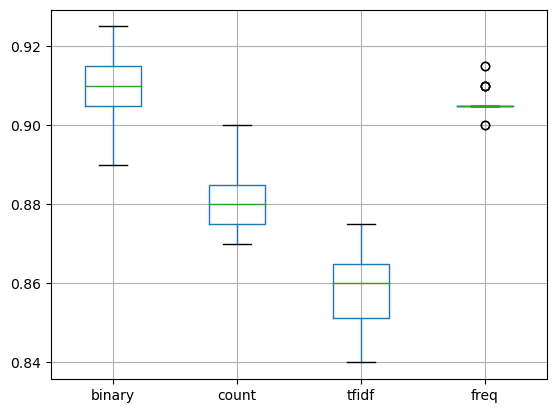

In [209]:
modes = ['binary', 'count', 'tfidf', 'freq']
results = DataFrame()
for mode in modes:
 # prepare data for mode
 Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
 # evaluate model on data for mode
 results[mode] = evaluate_mode(Xtrain, ytrain, Xtest, ytest)
# summarize results
print(results.describe())
# plot results
results.boxplot()
pyplot.show()

==> The binary and freq encodings tend to perform better than count and tfidf. However, binary appears to be the most robust in terms of maximum performance and consistency of results.

# Making a Prediction for New Reviews


In [210]:
# classify a review as negative (0) or positive (1)
def predict_sentiment(review, vocab, tokenizer, model):
    # clean
    tokens = clean_doc(review)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    # convert to line
    line = ' '.join(tokens)
    # encode
    encoded = tokenizer.texts_to_matrix([line], mode='freq')
    # prediction
    yhat = model.predict(encoded, verbose=0)
    return round(yhat[0,0])

In [211]:
# test positive text
text = 'Best movie ever!'
print(predict_sentiment(text, vocab, tokenizer, model))
# test negative text
text = 'This is a bad movie.'
print(predict_sentiment(text, vocab, tokenizer, model))

1
0


# Saving Model

In [212]:
model.save('movie_model.h5')  


C:\Users\BAZ INFO\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
